# Определение перспективного тарифа для телеком компании

## Описание проекта

Клиентам оператора сотовой связи предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.


## Описание тарифов

#### Тариф «Смарт»
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 3 рубля
   - сообщение: 3 рубля
   - 1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»
1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
   - минута разговора: 1 рубль
   - сообщение: 1 рубль
   - 1 Гб интернет-трафика: 150 рублей
**Значения минут и мегабайтов округляются вверх. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.**

<a id='content'></a>

### Содержание

[Описание данных](#step0)

Часть 1.  [Знакомство с данными](#step1)


Часть 2.  [Подготовка данных](#step2)
    
- 2.1. [Преобразование дат к типу dtypes](#step2_1)
   
- 2.2. [Количество сделанных звонков и израсходованных минут разговора по месяцам.](#step2_2)
   
- 2.3. [Количество отправленных сообщений по месяцам.](#step2_3)

- 2.4. [Объем израсходованного трафика по месяцам](#step2_4)

- 2.5. [Сводные таблицы параметров по месяцам для каждого пользователя](#step2_5)

- 2.6. [Вычисление помесячного дохода с каждого пользователя](#step2_6)


Часть 3.  [Анализ данных](#step3)

- 3.1. [Сколько минут разговора](#step3_1)

- 3.2. [Сколько сообщений](#step3_2)

- 3.3. [Сколько мегабайт](#step3_3)

- 3.4. [Анализ выручки](#step3_4)


Часть 4.  [Проверка гипотез](#step4)

- 4.1. [Cредняя выручка пользователей тарифов «Ультра» и «Смарт»](#step4_1)

- 4.2. [Средняя выручка пользователей из Москвы и из других регионов](#step4_2)

Часть 5.  [Выводы](#step5)



<a id='step0'></a>
## Описание данных

#### Таблица users (информация о пользователях):
- <i> user_id </i> — уникальный идентификатор пользователя
- first_name — имя пользователя
- last_name — фамилия пользователя
- age — возраст пользователя (годы)
- reg_date — дата подключения тарифа (день, месяц, год)
- churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
- city — город проживания пользователя
- tariff — название тарифного плана

#### Таблица calls (информация о звонках):
- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

#### Таблица messages (информация о сообщениях):
- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

#### Таблица internet (информация об интернет-сессиях):
- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

#### Таблица tariffs (информация о тарифах):
- tariff_name — название тарифа
- rub_monthly_fee — ежемесячная абонентская плата в рублях
- minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
- messages_included — количество сообщений в месяц, включённых в абонентскую плату
- mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
- rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
- rub_per_message — стоимость отправки сообщения сверх тарифного пакета
- rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

[В оглавление](#content)

<a id='step1'></a>

## Шаг 1.  Знакомство с данными


Путь к файлам: \
- /datasets/calls.csv 
- /datasets/internet.csv 
- /datasets/messages.csv 
- /datasets/tariffs.csv 
- /datasets/users.csv 


In [1]:
# Загрузим все необходимые библиотеки и датасеты.
from scipy import stats as st
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = 50
import matplotlib.pyplot as plt
import math


In [2]:
# Код загрузки датасетов для локального компьютера
users = pd.read_csv('users.csv')
tariffs = pd.read_csv('tariffs.csv')
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')

display(users.head(10))
print()
display(users.info())
print()
print('Посмотрим на пропуски в таблице users')
print(users.isnull().sum())
print()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None


Посмотрим на пропуски в таблице users
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64



1. Есть пропуски в дате прекращения пользования тарифом. По условию, эти пропуски обусловлены тем, что на момент выгрузки тарифы продолжали использоваться.
2. Даты в столбцах 'churn_date' и 'reg_date' в формате object.

In [3]:
print(users['churn_date'].unique())
print()
print('Посмотрим на уникальные значения тарифов - нет ли там ошибок:')
print(users['tariff'].unique())

[nan '2018-10-05' '2018-12-18' '2018-11-21' '2018-10-03' '2018-10-14'
 '2018-12-09' '2018-12-11' '2018-12-26' '2018-08-31' '2018-12-03'
 '2018-12-23' '2018-11-07' '2018-12-16' '2018-12-20' '2018-11-30'
 '2018-12-21' '2018-08-17' '2018-09-02' '2018-10-04' '2018-11-13'
 '2018-11-22' '2018-10-28' '2018-11-26' '2018-11-27' '2018-11-16'
 '2018-10-27' '2018-12-30' '2018-09-27' '2018-12-25' '2018-12-14'
 '2018-12-24' '2018-09-26' '2018-10-25']

Посмотрим на уникальные значения тарифов - нет ли там ошибок:
['ultra' 'smart']


   age  user_id
0   18        6
1   19        9
2   20        9
3   21       12
4   22        5


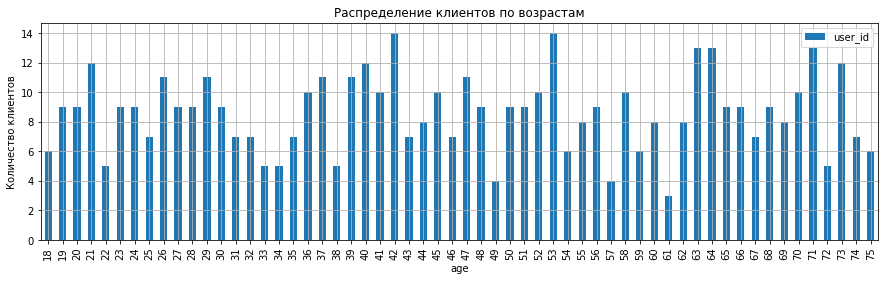

In [4]:
# поищем - нет ли ошибок в возрастах клиентов
def users_bar(colon, t):
    name = users.pivot_table(index=colon, values='user_id', aggfunc='count').reset_index()
    print(name.head())
    name.plot(x=colon,
              y=['user_id'], 
              kind='bar', 
              title=t, 
              grid=True, 
              figsize=(15, 4))
    plt.ylabel("Количество клиентов")
    plt.show()

t1='Распределение клиентов по возрастам'
users_bar('age', t1)


Всех возрастов в достатке и в разнообразии. Мобильной связи все возрасты покорны. Вроде ничего необычного.

          city  user_id
0  Архангельск        1
1    Астрахань        4
2     Балашиха        5
3      Барнаул        3
4     Белгород        2


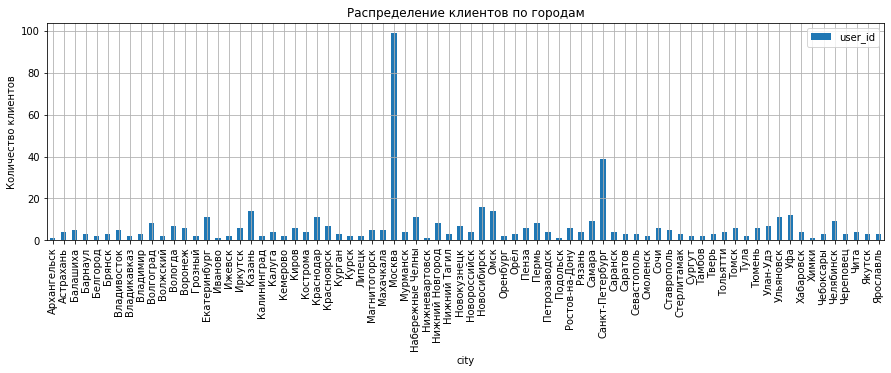

In [5]:
# Посмотрим, что с городами:
t2='Распределение клиентов по городам'
users_bar('city', t2)


Вроде бы все хорошо. Нормальные города, дубликатов и странностей не видно.\
Сразу хорошо видно, что количество пользователей в Москве сильно отличается от количества пользователей во всх остальных регионах. Почти 100 человек - это почти 20% выборки! 

In [6]:
# Посмотрим на таблицу тарифов.
display(tariffs.head(10))
print(tariffs.info())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


Ничего необычного. Две строчки с параметрами тарифов. Пропусков и дубликатов нет :)

In [7]:
# Посмотрим на таблицу звонков
def regard(tab, name):
    print()
    print(f'Первые строки таблицы {name}:')
    display(tab.head())
    print()
    print(f'Последние строки таблицы {name}:')
    display(tab.tail())
    print()
    print('info:')
    print(tab.info())
    print()
    print(f'Пропуски в таблице {name}')
    print(tab.isnull().sum())

regard(calls, 'звонков')



Первые строки таблицы звонков:


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000



Последние строки таблицы звонков:


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499



info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Пропуски в таблице звонков
id           0
call_date    0
duration     0
user_id      0
dtype: int64


1. Есть звонки длительностью 0. 
2. даты звонков в формате object
3. Надо будет округлять минуты в большую сторону в соответствии с условием тарифа
4. id - это тип object, "состоит" из двух значений - Id пользователя и номер звонка для этого пользователя

In [8]:
# посмотрим на таблицу internet
regard(internet, 'internet')


Первые строки таблицы internet:


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000



Последние строки таблицы internet:


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499



info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

Пропуски в таблице internet
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64


1. неудобное название колонки Unnamed:0. Да и вообще колонка странная - дублирует индексы
2. Даты в формате object
3. Есть нулевые значения трафика. Соединение не удалось. Пока нет уверенности, что с этим обязательно надо что-то делать. Ноль тоже может иметь значение.
4. По условию работы оператора, мегабайты округляются в большую сторону.
5. колонка id очень похожа на такую же колонку в таблице calls. И почти наверняка, эти индексы про разное, хоть и такие похожие по названию колонки и по структуре. И это может стать проблемой при объединении таблиц.

In [9]:
# Посмотрим на таблицу с сообщениями
regard(messages, 'messages')


Первые строки таблицы messages:


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000



Последние строки таблицы messages:


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499



info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None

Пропуски в таблице messages
id              0
message_date    0
user_id         0
dtype: int64


#### Выводы.
1. На входе - пять таблиц с данными
2. В таблице с данными клиентов есть много пропусков в столбце с датой прекращения пользования тарифом. Так как тарифы в этих случаях продолжают действовать на момент выгрузки данных. Пока даже нет уверенности, что мы этот столбец будем как-то использовать. Пусть пока будет как есть
3. Во всех таблицах даты приведены в формате object.
4. В трех таблицах (звонки, сообщения, интернет) - одинаковые значения id, которые соответствуют разным параметрам. И очень разное количество строк. То есть id = 1000_5 в таблице 'messages' и 1000_5 в таблице 'internet' - это совершенно разные id.
5. Столбец с диким названием и странными значениями Unnamed:0 в таблице internet
6. Есть длительности звонков 0 минут (пропущенные) и 0 мб - надо посмотреть, с чем это связано, и насколько это нам помешает

[В оглавление](#content)

<a id='step2'></a>

## Шаг 2. Подготовка данных
- Привести данные к нужным типам;
- Найти и исправть ошибки в данных.
    - Пояснить, какие ошибки найдены и как они исправлены. 
    - Обратить внимание, что длительность многих звонков — 0.0 минут. Это могут быть пропущенные звонки. 
    - Оценить, как отсутствие нулевых звонков повлияет на результаты анализа.

- Посчитать для каждого пользователя:
    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычесть бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножить на значение из тарифного плана; прибавить абонентскую плату, соответствующую тарифному плану).

[В оглавление](#content)

<a id='step2_1'></a>

### 2.1. Преобразование дат к типу dtypes

In [10]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

# проверим типы данных в столбцах с датами - все ли получилось
print('тип даты в users[churn_users]: ', users['churn_date'].dtypes)
print('тип даты в users[reg_users]: ', users['reg_date'].dtypes)


тип даты в users[churn_users]:  datetime64[ns]
тип даты в users[reg_users]:  datetime64[ns]



таблица calls


,id,call_date,duration,user_id,years,month
0,1000_0,2018-07-25,0.00,1000,2018,7
1,1000_1,2018-08-17,0.00,1000,2018,8
2,1000_2,2018-06-11,2.85,1000,2018,6
3,1000_3,2018-09-21,13.80,1000,2018,9
4,1000_4,2018-12-15,5.18,1000,2018,12


уникальные значения года в таблице calls :  [2018]
тип даты в calls:  datetime64[ns]
********************************************************************************

таблица internet


,Unnamed: 0,id,mb_used,session_date,user_id,years,month
0,0,1000_0,112.95,2018-11-25,1000,2018,11
1,1,1000_1,1052.81,2018-09-07,1000,2018,9
2,2,1000_2,1197.26,2018-06-25,1000,2018,6
3,3,1000_3,550.27,2018-08-22,1000,2018,8
4,4,1000_4,302.56,2018-09-24,1000,2018,9


уникальные значения года в таблице internet :  [2018]
тип даты в internet:  datetime64[ns]
********************************************************************************

таблица messages


,id,message_date,user_id,years,month
0,1000_0,2018-06-27,1000,2018,6
1,1000_1,2018-10-08,1000,2018,10
2,1000_2,2018-08-04,1000,2018,8
3,1000_3,2018-06-16,1000,2018,6
4,1000_4,2018-12-05,1000,2018,12


уникальные значения года в таблице messages :  [2018]
тип даты в messages:  datetime64[ns]
********************************************************************************


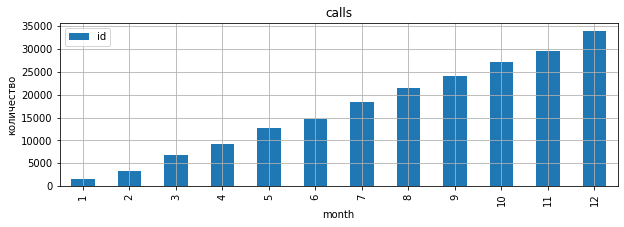

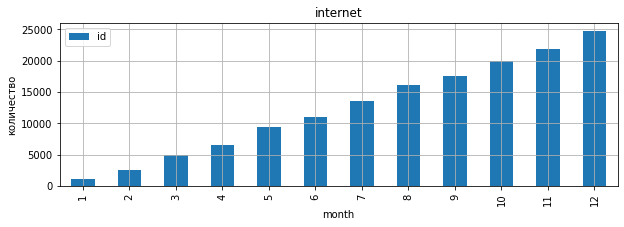

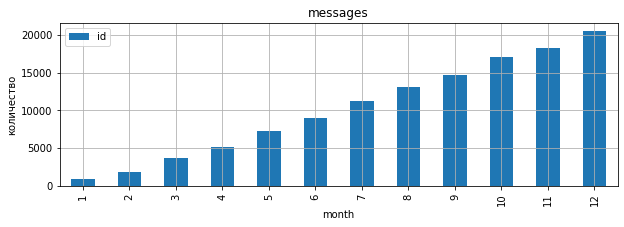

In [11]:
# Изменим тип дат в остальных таблицах.
# Создадим столбцы с годами и с месяцами
# Заодно Проверим, одного ли года данные


def months(tab, col, name):
    tab[col] = pd.to_datetime(tab[col], format='%Y-%m-%d')
    tab['years'] = pd.DatetimeIndex(tab[col]).year
    tab['month'] = pd.DatetimeIndex(tab[col]).month
    print()
    print(f'таблица {name}')
    display(tab.head())
    print('уникальные значения года в таблице {} : '.format(name), tab['years'].unique())
    print(f'тип даты в {name}: ', tab[col].dtypes)
    print(80*'*')

    (tab
     .pivot_table(index=['month'], values='id', aggfunc='count')
     .plot(y=['id'], 
           kind='bar', 
           title=name , 
           grid=True, 
           figsize=(10, 3))
    )
    plt.ylabel("количество")

months(calls, 'call_date', 'calls')
months(internet, 'session_date', 'internet')
months(messages, 'message_date', 'messages')




Как красиво растет использование услуг от месяца к месяцу!

In [12]:
display(calls['month'].value_counts())


12    33987
11    29501
10    27146
9     24061
8     21488
7     18298
6     14716
5     12647
4      9272
3      6687
2      3328
1      1476
Name: month, dtype: int64

In [13]:
# изменим название столбца в таблице internet
#internet = internet.rename(columns={"Unnamed: 0": "index0"})

#Удалим столбец "Unnamed: 0", который дублирует индексы
del internet['Unnamed: 0']
display(internet.head())

,id,mb_used,session_date,user_id,years,month
0,1000_0,112.95,2018-11-25,1000,2018,11
1,1000_1,1052.81,2018-09-07,1000,2018,9
2,1000_2,1197.26,2018-06-25,1000,2018,6
3,1000_3,550.27,2018-08-22,1000,2018,8
4,1000_4,302.56,2018-09-24,1000,2018,9


[В оглавление](#content)

<a id='step2_2'></a>

### 2.2. Количество сделанных звонков и израсходованных минут разговора по месяцам.

In [14]:
# округлим минуты разговора.
# по условию, оператор все минуты округляет в большую сторону
# воспользуемся методом ceil из библиотеки math.
calls['durat_ceil'] = calls['duration'].apply(lambda x: math.ceil(x)).astype('int')

display(calls.head())
calls.info()

,id,call_date,duration,user_id,years,month,durat_ceil
0,1000_0,2018-07-25,0.00,1000,2018,7,0
1,1000_1,2018-08-17,0.00,1000,2018,8,0
2,1000_2,2018-06-11,2.85,1000,2018,6,3
3,1000_3,2018-09-21,13.80,1000,2018,9,14
4,1000_4,2018-12-15,5.18,1000,2018,12,6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   years       202607 non-null  int64         
 5   month       202607 non-null  int64         
 6   durat_ceil  202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 10.8+ MB


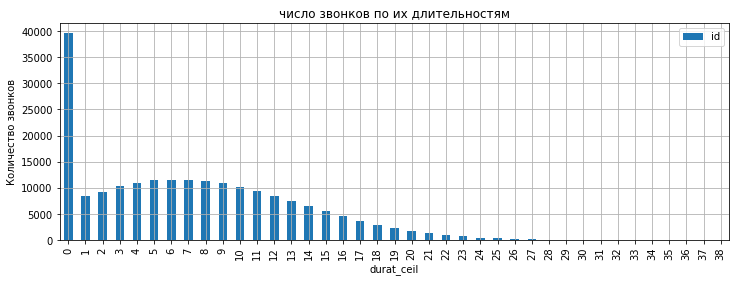

In [15]:
# много ли нулей в минутах звонков
#print(calls['durat_ceil'].value_counts())
t3 = 'число звонков по их длительностям'
def calls_durat_bar(df, t):
    (df.pivot_table(index=['durat_ceil'], 
                      values='id', 
                      aggfunc='count')
         .plot(y=['id'], 
               kind='bar', 
               title=t, 
               grid=True, 
               figsize=(12, 4))
    )
    plt.ylabel('Количество звонков')
    plt.show()

calls_durat_bar(calls, t3)

Количество нулевых минут впечатляет. Либо пользователи, как на подбор, интроверты. Либо многие люди берут себе тариф исключительно для интернета.

In [16]:
#Объединим таблицу calls с данными по пользователям, чтобы иметь сведения о тарифе
users_calls = calls.merge(users, on='user_id', how='left')
display(users_calls.head())
users_calls.info()

,id,call_date,duration,user_id,years,month,durat_ceil,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000_0,2018-07-25,0.00,1000,2018,7,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000_1,2018-08-17,0.00,1000,2018,8,0,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000_2,2018-06-11,2.85,1000,2018,6,3,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000_3,2018-09-21,13.80,1000,2018,9,14,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000_4,2018-12-15,5.18,1000,2018,12,6,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          202607 non-null  object        
 1   call_date   202607 non-null  datetime64[ns]
 2   duration    202607 non-null  float64       
 3   user_id     202607 non-null  int64         
 4   years       202607 non-null  int64         
 5   month       202607 non-null  int64         
 6   durat_ceil  202607 non-null  int64         
 7   age         202607 non-null  int64         
 8   churn_date  9919 non-null    datetime64[ns]
 9   city        202607 non-null  object        
 10  first_name  202607 non-null  object        
 11  last_name   202607 non-null  object        
 12  reg_date    202607 non-null  datetime64[ns]
 13  tariff      202607 non-null  object        
dtypes: datetime64[ns](3), float64(1), int64(5), object(5)
memory usage: 23.2+ MB


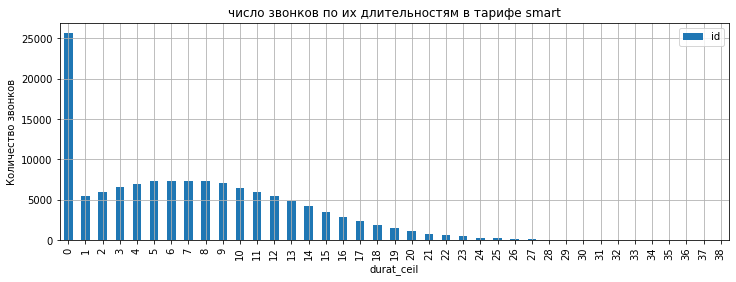

In [17]:
# Посмотрим на распределение длительностей звонков в срезе по тарифу smart
users_calls_smart = users_calls.query('tariff == "smart"')
t4 = 'число звонков по их длительностям в тарифе smart'
calls_durat_bar(users_calls_smart, t4)



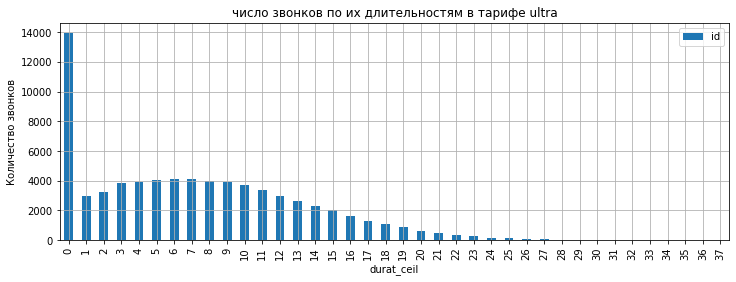

In [18]:
# Посмотрим на срез по тарифу ultra
users_calls_ultra = users_calls.query('tariff == "ultra"')
t5 = 'число звонков по их длительностям в тарифе ultra'
calls_durat_bar(users_calls_ultra, t5)

- Понятней не стало - в обоих тарифах много нулевых звонков.
- Итого - почти 40 тыс. нулевых звонков - это почти 20% от всех звонков.
- Похоже это тема отдельного кропотливого исследования - поиск причины. Это может оказаться показателем плохого качества связи, или показателем того, что есть категория пользователей, которым не нужны звонки, а нужен только интернет. Или это ультракороткие звонки, округленные системой до нуля.

In [19]:
# посчитаем кол-во звонков по месяцам для каждого пользователя и кол-во израсходованных минут разговора.
calls_month = (users_calls
               .pivot_table(index=['user_id', 'month'], 
                            values='durat_ceil', 
                            aggfunc={'count', 'sum'})
               .reset_index()
              )
#calls_month.columns = ['user_id', 'month', 'calls_count', 'calls_sum']
calls_month = calls_month.rename(columns = {'count': 'calls_count', 'sum': 'calls_sum'})
display(calls_month. head())

,user_id,month,calls_count,calls_sum
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466


In [20]:
# Создадим столбец с уникальными индексами, по которым мы сможем объединять помесячные таблицы
def index1(row):
    if row['month'] < 10:
        return int(str(row['user_id']) + '0' + str(row['month']))
    else:
        return int(str(row['user_id']) + str(row['month']))

test = calls_month.copy()
test['index1'] = test.apply(index1, axis=1)
display(test.head())
test.shape

,user_id,month,calls_count,calls_sum,index1
0,1000,5,22,159,100005
1,1000,6,43,172,100006
2,1000,7,47,340,100007
3,1000,8,52,408,100008
4,1000,9,58,466,100009


(3174, 5)

Эта процедура - артефакт. Оставлен для истории и смысловой нашрузки не несет.

In [21]:
# создадим таблицу без нулевых звонков
calls_not0 = calls.query('durat_ceil != 0')

# посчитаем кол-во звонков по месяцам и кол-во израсх. минут разговора.
calls_month_not0 = (calls_not0
               .pivot_table(index=['user_id', 'month'], 
                            values='durat_ceil', 
                            aggfunc={'count', 'sum'})
               .reset_index()
              )
calls_month_not0.columns = ['user_id', 'month', 'calls_count', 'calls_sum']

display(calls_month_not0.head())
print(calls_month_not0.shape)

,user_id,month,calls_count,calls_sum
0,1000,5,17,159
1,1000,6,28,172
2,1000,7,41,340
3,1000,8,42,408
4,1000,9,46,466


(3168, 4)


В принципе видно, что на суммарную длительность звонков эти нулевые значения не влияют. В дальнейшем, кажется, мы будем оценивать лишь длительность разговоров. Похоже, можно с этот выброс оставить как есть. Но если что, то у нас есть уже табличка с отрезанным выбросом.\
Кстати, удалить эти нулевые звонки можно с той же правомерностью, что и оставить - так как других данных в этой таблице нет, и мы ничего не потеряем, кроме информации о количестве нулевых звонков.

1. Мы выяснили, что в данных почти 20% звонков, которые длятся 0 секунд. Это очень много. Создали дополнительную таблицу, где удалили все нулевые звонки - о том, насколько правомерно удалять такой большой объем - еще предстоит разобраться.
2. Посчитали для каждого пользователя по месяцам количество звонков и количество израсходованных минут разговора.
3. Добавили к этим таблицам данные о пользователях и их тарифах
4. Посчитали доход с каждого клиента по звонкам

[В оглавление](#content)

<a id='step2_3'></a>

### 2.3. Количество отправленных сообщений по месяцам.

In [22]:
display(messages.head())

,id,message_date,user_id,years,month
0,1000_0,2018-06-27,1000,2018,6
1,1000_1,2018-10-08,1000,2018,10
2,1000_2,2018-08-04,1000,2018,8
3,1000_3,2018-06-16,1000,2018,6
4,1000_4,2018-12-05,1000,2018,12


In [23]:
messages_month = (messages
               .pivot_table(index=['user_id', 'month'], 
                            values='id', 
                            aggfunc='count')
               .reset_index()
              )
#messages_month1 = messages_month.merge(users, on='user_id', how='left')
messages_month = messages_month.rename(columns={"id": "count_mess"})
#messages_month.columns = ['user_id', 'month', 'mess_count']                  
display(messages_month.head(10))
messages_month.shape

,user_id,month,count_mess
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


(2717, 3)

In [24]:
messages_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2717 entries, 0 to 2716
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   user_id     2717 non-null   int64
 1   month       2717 non-null   int64
 2   count_mess  2717 non-null   int64
dtypes: int64(3)
memory usage: 63.8 KB


Итак, мы посчитали количество сообщений для каждого пользователя по месяцам


In [25]:
print('Длина таблицы звонков: ', calls_month.shape[0])
print('Длина таблицы сообщений: ', messages_month.shape[0])

Длина таблицы звонков:  3174
Длина таблицы сообщений:  2717


In [26]:
# Объединим таблицы звонков и сообщений по месяцам
users_month = calls_month.join(messages_month.set_index(['user_id', 'month']), 
                               on=['user_id', 'month'], 
                               rsuffix='_mess', 
                               how='outer')

display(users_month.head())
users_month.shape

,user_id,month,calls_count,calls_sum,count_mess
0,1000,5,22.0,159.0,22.0
1,1000,6,43.0,172.0,60.0
2,1000,7,47.0,340.0,75.0
3,1000,8,52.0,408.0,81.0
4,1000,9,58.0,466.0,57.0


(3213, 5)

In [27]:
# Подобным образом объединим таблицу для ненулевых звонков
users_month_not0 = calls_month_not0.join(messages_month.set_index(['user_id', 'month']), 
                                         on=['user_id', 'month'], 
                                         rsuffix='_mess', 
                                         how='outer')

display(users_month_not0.head())
users_month_not0.shape

,user_id,month,calls_count,calls_sum,count_mess
0,1000,5,17.0,159.0,22.0
1,1000,6,28.0,172.0,60.0
2,1000,7,41.0,340.0,75.0
3,1000,8,42.0,408.0,81.0
4,1000,9,46.0,466.0,57.0


(3212, 5)

[В оглавление](#content)

<a id='step2_4'></a>

### 2.4. Объем израсходованного трафика по месяцам.

In [28]:
# округлим значения трафика в большую сторону
import math
internet['mb_ceil'] = internet['mb_used'].apply(lambda x: math.ceil(x)).astype('int')
internet.head()

,id,mb_used,session_date,user_id,years,month,mb_ceil
0,1000_0,112.95,2018-11-25,1000,2018,11,113
1,1000_1,1052.81,2018-09-07,1000,2018,9,1053
2,1000_2,1197.26,2018-06-25,1000,2018,6,1198
3,1000_3,550.27,2018-08-22,1000,2018,8,551
4,1000_4,302.56,2018-09-24,1000,2018,9,303


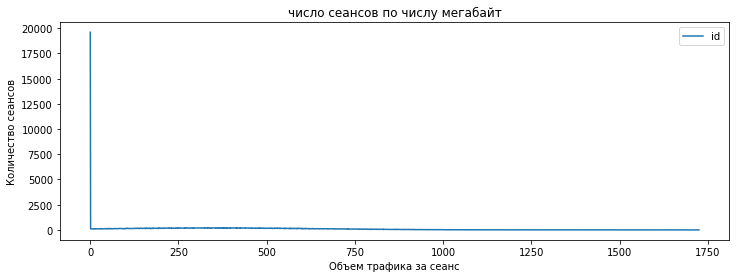

In [29]:
# Посмотрим на число сеансов связи по числу мегабайт
t6 = 'число сеансов по числу мегабайт'
(internet
     .pivot_table(index=['mb_ceil'], 
                  values='id', 
                  aggfunc='count')
     .plot(title=t6 , figsize=(12, 4))
    )
plt.xlabel('Объем трафика за сеанс')
plt.ylabel('Количество сеансов')
plt.show()

In [30]:
# похоже, что у нас выброс из 20 тысяч нулевых соединений, когда объем трафика = 0 мб
print(len(internet.query('mb_ceil == 0')))
print('Это {:.2f} % от всех соединений'.format(19598/1493.96))

19598
Это 13.12 % от всех соединений


In [31]:
# Попробуем отбросить этот выброс. Создадим табличку с ненулевыми соединениями.
internet_not0 = internet.query('mb_ceil != 0')

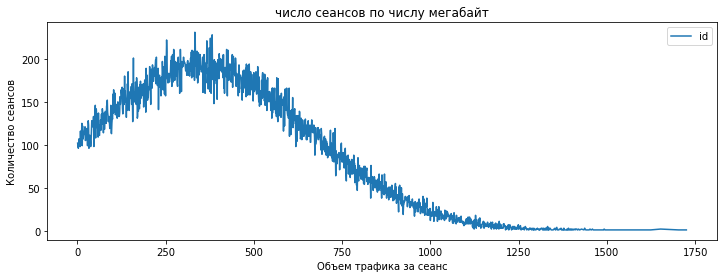

In [32]:
(internet_not0
     .pivot_table(index=['mb_ceil'], 
                  values='id', 
                  aggfunc='count')
     .plot(title=t6 , figsize=(12, 4))
    )
plt.xlabel('Объем трафика за сеанс')
plt.ylabel('Количество сеансов')
plt.show()

Так выглядит лучше. Но пока непонятно, насколько это правильно - отбрасывать хвост из 13% данных, хоть и нулевых

In [33]:
# Создадим таблицу расхода трафика по месяцам для каждого пользователя
internet_month = (internet
               .pivot_table(index=['user_id', 'month'], 
                            values='mb_ceil', 
                            aggfunc={'count', 'sum'})
               .reset_index()
              )
internet_month.columns = ['user_id', 'month', 'mb_count', 'mb_sum']

display(internet_month.head())
internet_month.shape


,user_id,month,mb_count,mb_sum
0,1000,5,5,2256
1,1000,6,49,23257
2,1000,7,29,14016
3,1000,8,29,14070
4,1000,9,27,14581


(3203, 4)

In [34]:
# Таблица по месяцам для ненулевых трафиков
internet_month_not0 = (internet_not0
               .pivot_table(index=['user_id', 'month'], 
                            values='mb_ceil', 
                            aggfunc={'count', 'sum'})
               .reset_index()
              )
internet_month_not0.columns = ['user_id', 'month', 'mb_count', 'mb_sum']

display(internet_month_not0.head())
internet_month_not0.shape

,user_id,month,mb_count,mb_sum
0,1000,5,4,2256
1,1000,6,44,23257
2,1000,7,28,14016
3,1000,8,27,14070
4,1000,9,25,14581


(3201, 4)

[В оглавление](#content)

<a id='step2_5'></a>

### 2.5. Сводные таблицы параметров по месяцам для каждого пользователя

In [35]:
# Добавим в нашу сводную таблицу users_month данные по расходу интернет-трафика
users_month = users_month.join(internet_month.set_index(['user_id', 'month']), 
                               on=['user_id', 'month'], 
                               rsuffix='_int', 
                               how='outer')

#users_month = users_month.merge(internet_month, on='index1', how='outer')
display(users_month.head(10))
users_month.shape

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,22.0,159.0,22.0,5.0,2256.0
1,1000,6,43.0,172.0,60.0,49.0,23257.0
2,1000,7,47.0,340.0,75.0,29.0,14016.0
3,1000,8,52.0,408.0,81.0,29.0,14070.0
4,1000,9,58.0,466.0,57.0,27.0,14581.0
5,1000,10,57.0,350.0,73.0,27.0,14717.0
6,1000,11,43.0,338.0,58.0,24.0,14768.0
7,1000,12,46.0,333.0,70.0,21.0,9827.0
8,1001,11,59.0,430.0,NaN,55.0,18452.0
9,1001,12,63.0,414.0,NaN,41.0,14053.0


(3214, 7)

In [36]:
users_month.isnull().sum()

user_id          0
month            0
calls_count     40
calls_sum       40
count_mess     497
mb_count        11
mb_sum          11
dtype: int64

После объединения закономерно появились пропуски

In [37]:
# Заменим в числовых столбцах пропуски на 0
users_month['calls_count'] = users_month['calls_count'].fillna(0).astype('int')
users_month['calls_sum'] = users_month['calls_sum'].fillna(0).astype('int')
users_month['count_mess'] = users_month['count_mess'].fillna(0).astype('int')
users_month['mb_count'] = users_month['mb_count'].fillna(0).astype('int')
users_month['mb_sum'] = users_month['mb_sum'].fillna(0).astype('int')
# Исправим индексы
users_month = users_month.reset_index(drop=True)
display(users_month.head(10))
display(users_month.tail())

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,22,159,22,5,2256
1,1000,6,43,172,60,49,23257
2,1000,7,47,340,75,29,14016
3,1000,8,52,408,81,29,14070
4,1000,9,58,466,57,27,14581
5,1000,10,57,350,73,27,14717
6,1000,11,43,338,58,24,14768
7,1000,12,46,333,70,21,9827
8,1001,11,59,430,0,55,18452
9,1001,12,63,414,0,41,14053


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
3209,1489,9,0,0,32,63,17232
3210,1489,10,0,0,21,63,19588
3211,1489,11,0,0,20,55,17516
3212,1489,12,0,0,35,51,17341
3213,1476,4,0,0,0,1,531


In [38]:
# Сводная таблица с ненулевыми звонками и мегабайтами
users_month_not0 = (users_month_not0
                    .join(internet_month_not0.set_index(['user_id', 'month']), 
                          on=['user_id', 'month'], 
                          rsuffix='_int', 
                          how='outer')
                    .reset_index(drop=True)        
                   )

display(users_month_not0.head())
users_month_not0.shape

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,17.0,159.0,22.0,4.0,2256.0
1,1000,6,28.0,172.0,60.0,44.0,23257.0
2,1000,7,41.0,340.0,75.0,28.0,14016.0
3,1000,8,42.0,408.0,81.0,27.0,14070.0
4,1000,9,46.0,466.0,57.0,25.0,14581.0


(3214, 7)

In [39]:
users_month_not0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user_id      3214 non-null   int64  
 1   month        3214 non-null   int64  
 2   calls_count  3168 non-null   float64
 3   calls_sum    3168 non-null   float64
 4   count_mess   2717 non-null   float64
 5   mb_count     3201 non-null   float64
 6   mb_sum       3201 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 175.9 KB


In [40]:
# Сводную таблицу с удаленными нулями из стартовых данных тоже надо причесать:

# Заменим в числовых столбцах пропуски на 0
users_month_not0['calls_count'] = users_month_not0['calls_count'].fillna(0).astype('int')
users_month_not0['calls_sum'] = users_month_not0['calls_sum'].fillna(0).astype('int')
users_month_not0['count_mess'] = users_month_not0['count_mess'].fillna(0).astype('int')
users_month_not0['mb_count'] = users_month_not0['mb_count'].fillna(0).astype('int')
users_month_not0['mb_sum'] = users_month_not0['mb_sum'].fillna(0).astype('int')
 
display(users_month_not0.head())
display(users_month_not0.tail())

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,17,159,22,4,2256
1,1000,6,28,172,60,44,23257
2,1000,7,41,340,75,28,14016
3,1000,8,42,408,81,27,14070
4,1000,9,46,466,57,25,14581


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
3209,1489,10,0,0,21,52,19588
3210,1489,11,0,0,20,45,17516
3211,1489,12,0,0,35,43,17341
3212,1240,2,0,0,0,3,961
3213,1476,4,0,0,0,1,531


In [41]:
# посмотрим еще раз на сводные таблицы с нулями и без них:
display(users_month.head(10))
display(users_month_not0.head(10))


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,22,159,22,5,2256
1,1000,6,43,172,60,49,23257
2,1000,7,47,340,75,29,14016
3,1000,8,52,408,81,29,14070
4,1000,9,58,466,57,27,14581
5,1000,10,57,350,73,27,14717
6,1000,11,43,338,58,24,14768
7,1000,12,46,333,70,21,9827
8,1001,11,59,430,0,55,18452
9,1001,12,63,414,0,41,14053


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum
0,1000,5,17,159,22,4,2256
1,1000,6,28,172,60,44,23257
2,1000,7,41,340,75,28,14016
3,1000,8,42,408,81,27,14070
4,1000,9,46,466,57,25,14581
5,1000,10,44,350,73,27,14717
6,1000,11,37,338,58,23,14768
7,1000,12,38,333,70,19,9827
8,1001,11,45,430,0,47,18452
9,1001,12,47,414,0,35,14053


Итак мы:
1. округлили звонки и трафик в большую сторону, 
2. Обнаружили большие выбросы нулевых значений в данных по звонкам и по интернету 
3. Cоздали таблицы с количеством и длительностью звонков, с количетвом сообщений и с количеством соединений и израсходованными мегабайтами по пользователям по месяцам для двух случаев: с удаленным выбросом нулевых звонков и трафиков и с неудаленным.
4. Из сравнения таблиц видно, что удаленные нулевые количества звонков и мегабайт проявляют себя только там, где используется количество звонков и количество сеансов мобильного интернета а не их длительности и объёмы. Сейчас становится понятно, что скорее всего эти параметры при дальнейшем анализе использоваться не будут, а значит, можно спокойно использовать исходные данные с нулями и не бояться, что они нам что-то испортят. Но про себя будем помнить про возможность влияния этих выбросов нулевых значений при использовании параметров количества соединений(звонков и интернет-соединений). На этот случай у нас уже готова сводная табличка с отрезанными выбросами.

[В оглавление](#content)

<a id='step2_6'></a>

### 2.6. Вычисление помесячного дохода с каждого пользователя

In [42]:
# Теперь надо вычислить доход с каждого пользователя.
# Из количетва сообщений в месяц вычесть бесплатный лимит
# превышение умножить на стоимость по тарифу
# прибавить абонентскую плату.
#messages_month3 = messages_month2.join(tariffs.set_index('tariff_name'), on='tariff', how='left')


In [43]:
# Добавим в сводную таблицу данные о пользователях и о тарифах
users_month = users_month.join(users.set_index('user_id'), 
                               on='user_id', 
                               how='left')
users_month = users_month.join(tariffs.set_index('tariff_name'), 
                               on='tariff', 
                               how='left')
users_month.head()

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22,159,22,5,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43,172,60,49,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47,340,75,29,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52,408,81,29,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58,466,57,27,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [44]:
# выручка 
def income(row):
    calls_plus = row['calls_sum'] - row['minutes_included']
    messages_plus = row['count_mess'] - row['messages_included']
    mb_plus = row['mb_sum'] - row['mb_per_month_included']
    if calls_plus < 0:
        calls_plus = 0
    if messages_plus < 0:
        messages_plus = 0
    if mb_plus < 0:
        mb_plus = 0
    mb_plus = math.ceil(mb_plus / 1024)
    return (calls_plus * row['rub_per_minute'] + messages_plus * row['rub_per_message'] + 
           mb_plus * row['rub_per_gb'] + row['rub_monthly_fee'])

users_month['income'] = users_month.apply(income, axis=1)

display(users_month.head())
display(users_month.tail())
#earning['call_earn'] = (earning['sum'] 
#                        - earning['minutes_included']) * earning['rub_per_minute'] + earning['rub_monthly_fee']

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,5,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,49,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,29,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,29,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,27,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
3209,1489,9,0,0,32,63,17232,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,950
3210,1489,10,0,0,21,63,19588,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1550
3211,1489,11,0,0,20,55,17516,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1150
3212,1489,12,0,0,35,51,17341,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,950
3213,1476,4,0,0,0,1,531,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1,1950


In [45]:
# для среза без нулевых звонков и мегабайт
users_month_not0
users_month_not0 = users_month_not0.join(users.set_index('user_id'), 
                                         on='user_id', 
                                         how='left')
users_month_not0 = users_month_not0.join(tariffs.set_index('tariff_name'), 
                                         on='tariff', 
                                         how='left')
users_month_not0['income'] = users_month_not0.apply(income, axis=1)

display(users_month_not0.head())
display(users_month_not0.tail())

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,17,159,22,4,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,28,172,60,44,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,41,340,75,28,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,42,408,81,27,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,46,466,57,25,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
3209,1489,10,0,0,21,52,19588,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1550
3210,1489,11,0,0,20,45,17516,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,1150
3211,1489,12,0,0,35,43,17341,35,NaT,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3,950
3212,1240,2,0,0,0,3,961,30,NaT,Воронеж,Зинаида,Шарова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1,1950
3213,1476,4,0,0,0,1,531,50,NaT,Москва,Валентина,Семенова,2018-04-30,ultra,1000,30720,3000,1950,150,1,1,1950


### Вывод
1. Мы изменили типы данных для дат во всех таблицах.
2. Обнаружили большое количество нулевых значений в длительностях звонков (20%) и в объемах онтернет-соединений (13%)
3. Посчитали количество и сумарные длительности звонков, количество сообщений и объемы трафика для каждого пользователя по месяцам.
4. Свели все эти данные в одну таблицу и посчитали доход с каждого пользователя по месяцам
5. Аналогичные действия и рсчеты провели для выборки, из которой удалили все нулевые звонки и мегабайты.
6. Пришли к выводу, что можно использовать исходные данные, содержащие выбросы нулевых значений. 

[В оглавление](#content)

<a id='step3'></a>


## Шаг 3. Анализ данных
- Опишите поведение клиентов оператора, исходя из выборки. 
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? 
- Посчитайте среднее количество, дисперсию и стандартное отклонение. 
- Постройте гистограммы. Опишите распределения.


In [46]:
# Сделаем срезы по тарифам
ultra = users_month.query('tariff == "ultra"')
smart = users_month.query('tariff == "smart"')

display(ultra.head())
display(smart.head())

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,5,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,49,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,29,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,29,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,27,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
8,1001,11,59,430,0,55,18452,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,1350
9,1001,12,63,414,0,41,14053,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,50,15360,500,550,200,3,3,550
10,1002,6,15,117,4,34,10871,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,550
11,1002,7,26,214,11,58,17601,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,1150
12,1002,8,42,289,13,60,20347,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,50,15360,500,550,200,3,3,1550


[В оглавление](#content)

<a id='step3_1'></a>

### 3.1. Сколько минут разговора

In [47]:
per_month = users_month.pivot_table(index=['month'], 
                                    columns='tariff',
                                    values=['calls_sum', 'count_mess', 'mb_sum'],
                                    aggfunc={'median', 'mean', 'max'}
                                   ).reset_index()
#.rename_axis(axis="columns")
#.rename_axis(mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False)
display(per_month.head(3))
print(per_month.columns)

month calls_sum                                                \
                   max                mean             median          
tariff           smart   ultra       smart       ultra  smart  ultra   
0          1     551.0   861.0  203.852941  428.111111  162.5  382.0   
1          2     747.0   919.0  298.689655  297.125000  258.0  168.0   
2          3     822.0  1609.0  390.051948  489.648649  409.0  403.0   

       count_mess                                             mb_sum           \
              max              mean            median            max            
tariff      smart  ultra      smart      ultra  smart ultra    smart    ultra   
0            74.0   75.0  18.235294  33.777778   15.0  32.0  24147.0  19707.0   
1            85.0   90.0  24.086207  21.958333   20.0   5.5  28523.0  32655.0   
2           110.0  155.0  31.857143  32.297297   23.0  20.0  24990.0  37362.0   

                                                      
                mean                 median           
tariff         smart         ultra    smart    ultra  
0        8524.441176  13153.555556   7107.0  14808.0  
1       11611.396552  11786.958333  12572.5   7335.5  
2       15123.857143  17551.972973  15690.0  17513.0

MultiIndex([(     'month',       '',      ''),
            ( 'calls_sum',    'max', 'smart'),
            ( 'calls_sum',    'max', 'ultra'),
            ( 'calls_sum',   'mean', 'smart'),
            ( 'calls_sum',   'mean', 'ultra'),
            ( 'calls_sum', 'median', 'smart'),
            ( 'calls_sum', 'median', 'ultra'),
            ('count_mess',    'max', 'smart'),
            ('count_mess',    'max', 'ultra'),
            ('count_mess',   'mean', 'smart'),
            ('count_mess',   'mean', 'ultra'),
            ('count_mess', 'median', 'smart'),
            ('count_mess', 'median', 'ultra'),
            (    'mb_sum',    'max', 'smart'),
            (    'mb_sum',    'max', 'ultra'),
            (    'mb_sum',   'mean', 'smart'),
            (    'mb_sum',   'mean', 'ultra'),
            (    'mb_sum', 'median', 'smart'),
            (    'mb_sum', 'median', 'ultra')],
           names=[None, None, 'tariff'])


In [48]:
#per_month.columns = ['_'.join(col) for col in per_month.columns]

per_month.columns = per_month.columns.map(''.join)

#per_month.columns = per_month.columns.droplevel(0)
display(per_month.head(3))
print(per_month.columns)

,month,calls_summaxsmart,calls_summaxultra,calls_summeansmart,calls_summeanultra,calls_summediansmart,calls_summedianultra,count_messmaxsmart,count_messmaxultra,count_messmeansmart,count_messmeanultra,count_messmediansmart,count_messmedianultra,mb_summaxsmart,mb_summaxultra,mb_summeansmart,mb_summeanultra,mb_summediansmart,mb_summedianultra
0,1,551.0,861.0,203.852941,428.111111,162.5,382.0,74.0,75.0,18.235294,33.777778,15.0,32.0,24147.0,19707.0,8524.441176,13153.555556,7107.0,14808.0
1,2,747.0,919.0,298.689655,297.125000,258.0,168.0,85.0,90.0,24.086207,21.958333,20.0,5.5,28523.0,32655.0,11611.396552,11786.958333,12572.5,7335.5
2,3,822.0,1609.0,390.051948,489.648649,409.0,403.0,110.0,155.0,31.857143,32.297297,23.0,20.0,24990.0,37362.0,15123.857143,17551.972973,15690.0,17513.0


Index(['month', 'calls_summaxsmart', 'calls_summaxultra', 'calls_summeansmart',
       'calls_summeanultra', 'calls_summediansmart', 'calls_summedianultra',
       'count_messmaxsmart', 'count_messmaxultra', 'count_messmeansmart',
       'count_messmeanultra', 'count_messmediansmart', 'count_messmedianultra',
       'mb_summaxsmart', 'mb_summaxultra', 'mb_summeansmart',
       'mb_summeanultra', 'mb_summediansmart', 'mb_summedianultra'],
      dtype='object')


In [49]:
per_month = per_month.rename(columns = {('month'):'month', 
                                        ('calls_summaxsmart'):'s_calls_max', 
                                        ('calls_summaxultra'):'u_calls_max', 
                                        ('calls_summeansmart'):'s_calls_mean', 
                                        ('calls_summeanultra'):'u_calls_mean', 
                                        ('calls_summediansmart'):'s_calls_median', 
                                        ('calls_summedianultra'):'u_calls_median', 
                                        ('count_messmaxsmart'):'s_mess_max', 
                                        ('count_messmaxultra'):'u_mess_max', 
                                        ('count_messmeansmart'):'s_mess_mean', 
                                        ('count_messmeanultra'):'u_mess_mean', 
                                        ('count_messmediansmart'):'s_mess_median', 
                                        ('count_messmedianultra'):'u_mess_median', 
                                        ('mb_summaxsmart'):'s_mb_max', 
                                        ('mb_summaxultra'):'u_mb_max', 
                                        ('mb_summeansmart'):'s_mb_mean', 
                                        ('mb_summeanultra'):'u_mb_mean', 
                                        ('mb_summediansmart'):'s_mb_median', 
                                        ('mb_summedianultra'):'u_mb_median'}
                            )

display(per_month)
print(per_month.columns)

,month,s_calls_max,u_calls_max,s_calls_mean,u_calls_mean,s_calls_median,u_calls_median,s_mess_max,u_mess_max,s_mess_mean,u_mess_mean,s_mess_median,u_mess_median,s_mb_max,u_mb_max,s_mb_mean,u_mb_mean,s_mb_median,u_mb_median
0,1,551.0,861.0,203.852941,428.111111,162.5,382.0,74.0,75.0,18.235294,33.777778,15.0,32.0,24147.0,19707.0,8524.441176,13153.555556,7107.0,14808.0
1,2,747.0,919.0,298.689655,297.125000,258.0,168.0,85.0,90.0,24.086207,21.958333,20.0,5.5,28523.0,32655.0,11611.396552,11786.958333,12572.5,7335.5
2,3,822.0,1609.0,390.051948,489.648649,409.0,403.0,110.0,155.0,31.857143,32.297297,23.0,20.0,24990.0,37362.0,15123.857143,17551.972973,15690.0,17513.0
3,4,785.0,1096.0,367.133929,458.018182,368.5,453.0,105.0,143.0,30.741071,31.563636,28.0,17.0,27066.0,37143.0,13479.482143,16843.800000,14104.5,16662.0
4,5,820.0,1232.0,387.361702,510.328358,433.0,519.0,103.0,148.0,33.773050,37.850746,30.0,25.0,29761.0,43874.0,15825.198582,19381.194030,16343.0,18717.0
5,6,875.0,1410.0,395.640244,479.702381,400.0,479.0,134.0,201.0,33.402439,41.726190,28.0,27.5,33927.0,42291.0,15814.768293,18942.238095,16095.5,19495.5
6,7,839.0,1311.0,408.353234,545.791209,414.0,542.0,137.0,211.0,33.751244,49.846154,29.0,38.0,29495.0,45222.0,15763.512438,20514.648352,15948.0,20034.0
7,8,1000.0,1321.0,421.468085,510.775701,432.0,500.0,134.0,180.0,33.638298,48.439252,27.0,40.0,31115.0,48395.0,16632.174468,19594.065421,16855.0,18945.0
8,9,843.0,1297.0,428.611538,539.443478,435.0,520.0,136.0,188.0,33.638462,52.286957,30.0,43.0,31054.0,42217.0,16324.526923,19222.208696,16050.0,19675.0
9,10,1005.0,1401.0,426.136054,558.081301,427.5,533.0,139.0,223.0,33.765306,58.430894,30.0,49.0,32781.0,49789.0,16778.564626,20063.869919,17248.5,20359.0


Index(['month', 's_calls_max', 'u_calls_max', 's_calls_mean', 'u_calls_mean',
       's_calls_median', 'u_calls_median', 's_mess_max', 'u_mess_max',
       's_mess_mean', 'u_mess_mean', 's_mess_median', 'u_mess_median',
       's_mb_max', 'u_mb_max', 's_mb_mean', 'u_mb_mean', 's_mb_median',
       'u_mb_median'],
      dtype='object')


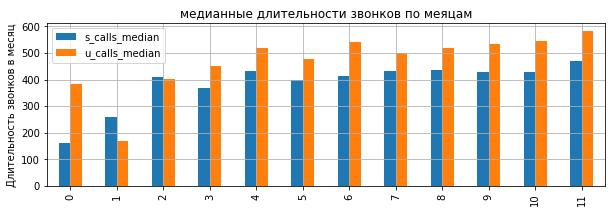

In [50]:
#t7 = 'медианные длительности звонков по меяцам'
per_month.plot(y=['s_calls_median', 'u_calls_median'], 
               kind='bar', 
               grid=True, 
               figsize=(10, 3))
plt.title('медианные длительности звонков по меяцам')
plt.ylabel('Длительность звонков в месяц')
plt.show()


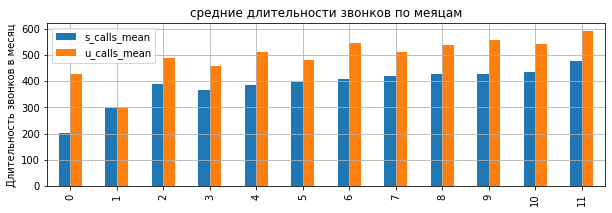

In [51]:
per_month.plot(y=['s_calls_mean', 'u_calls_mean'], 
               kind='bar', 
               grid=True, 
               figsize=(10, 3))
plt.title('средние длительности звонков по меяцам')
plt.ylabel('Длительность звонков в месяц')
plt.show()

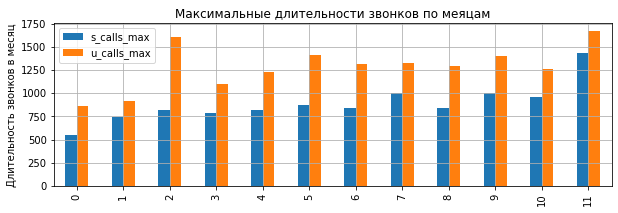

In [52]:
per_month.plot(y=['s_calls_max', 'u_calls_max'], 
               kind='bar', 
               grid=True, 
               figsize=(10, 3))
plt.title('Максимальные длительности звонков по меяцам')
plt.ylabel('Длительность звонков в месяц')
plt.show()

 Из графика медианных значений длительности звонков по месяцам видно, что использование тарифов постепенно растет от месяца к месяцу.
 
 Однако, при этом видно, что если первые месяцы мы имеем еще мало пользователей, то пимерно с 5 месяца значения медиан начинают выравниваться. Если еще посмотреть на средние значения, то относительно стабильным кажется участок с 7 по 12 месяц. \
Еще заметоно, что декабре люди больше разговаривают по телефону, чем в другие месяцы. 

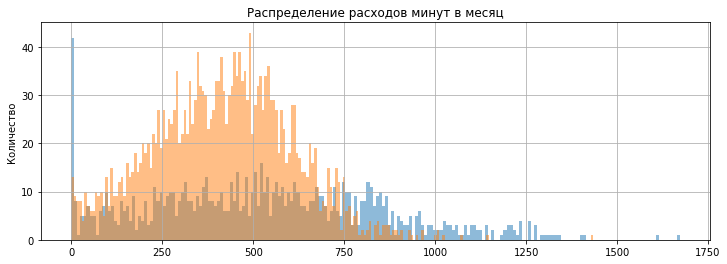

In [53]:
# Посмотрим на распределение помесячных расходов минут.
ultra['calls_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
smart['calls_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
plt.title('Распределение расходов минут в месяц')
plt.ylabel('Количество')
plt.show()

In [54]:
# Посмотрим сколько появилось строк с нулями в calls_sum:
def nulls_month():
    u=len(ultra)
    s=len(smart)
    u0 = len(ultra00)
    s0 = len(smart00)
    
    print('число строк с 0 минут в месяц (ultra)', u0)
    print('общее число строк (ultra)', u)
    print(f'Доля строк с 0 минут в месяц от всех строк в % (ultra): {(u0 / u) * 100}%')
    print()
    print('число строк с 0 минут в месяц (smart)', s0)
    print('общее число строк (Smart)', s)
    print(f'Доля строк с 0 значений в месяц от всех строк (smart): {(s0 / s) * 100} %')
    
ultra00 = ultra.query('calls_sum == 0')
smart00 = smart.query('calls_sum == 0')
nulls_month()


число строк с 0 минут в месяц (ultra) 38
общее число строк (ultra) 985
Доля строк с 0 минут в месяц от всех строк в % (ultra): 3.857868020304569%

число строк с 0 минут в месяц (smart) 8
общее число строк (Smart) 2229
Доля строк с 0 значений в месяц от всех строк (smart): 0.3589053387169134 %


После объединения таблиц у нас появились строки, в которых звонков - 0 минут в месяц. И сейчас эти нули создают нам неудобный выброс в распределении длительности разговоров. Этих нулей не было изначально, и значит мы можем их удалить из выборки для анализа длительностей звонков

(Но всё же эти нули показатель, что в определенные месяцы не пользовались услугами звонков.)

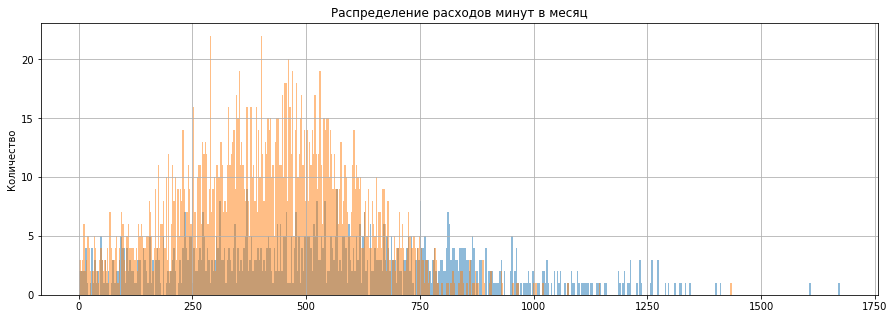

In [55]:
ultra_calls = ultra.query('calls_sum != 0')
smart_calls = smart.query('calls_sum != 0')
ultra_calls['calls_sum'].hist(bins=500, alpha=0.5, figsize=(15, 5))
smart_calls['calls_sum'].hist(bins=500, alpha=0.5, figsize=(15, 5))
plt.title('Распределение расходов минут в месяц')
plt.ylabel('Количество')
plt.show()


In [56]:
# Числовое описание распределения помесячных длительностей разговоров.
def calls_descibe(ultra_z, smart_z, var_ultra, var_smart):
    var_ultra = np.var(ultra_z['calls_sum'], ddof=1)
    var_smart = np.var(smart_z['calls_sum'], ddof=1)
    print('дисперсия длительностей звонков для тарифа ultra: ', var_ultra)
    print('дисперсия длительностей звонков для тарифа smart: ', var_smart)
    print()
    print('числовое описание данных по call_sum для тарифа ultra')
    print(ultra_z['calls_sum'].describe())
    print()
    print('числовое описание данных по call_sum для тарифа smart')
    print(smart_z['calls_sum'].describe())

var_calls_ultra=0
var_call_smart=0
calls_descibe(ultra_calls, smart_calls, var_calls_ultra, var_call_smart)


дисперсия длительностей звонков для тарифа ultra:  93338.42829141095
дисперсия длительностей звонков для тарифа smart:  35718.128533936906

числовое описание данных по call_sum для тарифа ultra
count     947.000000
mean      547.755016
std       305.513385
min         1.000000
25%       311.000000
50%       529.000000
75%       758.000000
max      1673.000000
Name: calls_sum, dtype: float64

числовое описание данных по call_sum для тарифа smart
count    2221.000000
mean      419.440342
std       188.992403
min         2.000000
25%       285.000000
50%       423.000000
75%       546.000000
max      1435.000000
Name: calls_sum, dtype: float64


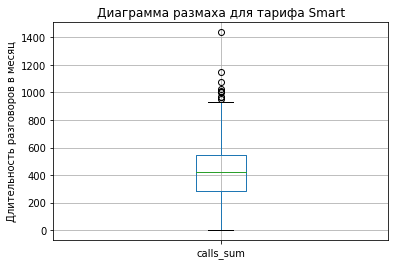

In [57]:
smart_calls.plot(y = 'calls_sum',
                 kind = 'box',
                 grid = True)
#ultra_calls.boxplot(column='calls_sum')
plt.title('Диаграмма размаха для тарифа Smart')
plt.ylabel('Длительность разговоров в месяц')
plt.show()


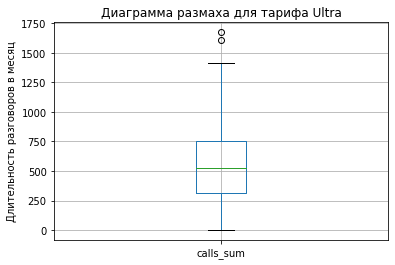

In [58]:
ultra_calls.boxplot(column='calls_sum')
plt.title('Диаграмма размаха для тарифа Ultra')
plt.ylabel('Длительность разговоров в месяц')
plt.show()

In [59]:
#smart['calls_sum'].quantile(0.7)
minut500 = len((smart_calls.query('calls_sum > 500')))
print('Число случаев, не уложившихся в 500 минут в месяц в Smart: ', minut500)
print(f'Доля случаев, когда клиенты не уложились в 500 минут тарифа Smart: {minut500 / 22.21} %')

Число случаев, не уложившихся в 500 минут в месяц в Smart:  754
Доля случаев, когда клиенты не уложились в 500 минут тарифа Smart: 33.94867176947321 %


In [60]:
print('Правый ус в Smart:', 546 + (546-285) * 1.5)


Правый ус в Smart: 937.5


In [61]:
print(ultra_calls['calls_sum'].quantile(0.9))
print(ultra_calls['calls_sum'].quantile(0.99))

949.8
1293.7799999999997


#### Итак, выводы от звонках:
1. за исследуемый год популярность телефонных разговоров постепенно росла от месяца к месяцу. Пик популярности наблюдается в 12 месяце, но это может быть связано не только с постепенным ежемесячным приростом, но и с обыкновенным новогодним ажиотажем.
2. После создания сводной таблицы, в некоторых столбцах появились пустые значения, которые мы заменили ранее нулями. То есть у нас появилсь информация о том, что некоторые клиенты в некоторые месяцы использовали, например, интернет, но не использовали звонки. Особенно заметны эти нули в тарифе "Ультра". Поскольку этих нулей не было изначально в наших данных, и поскольку они мешают анализу, создавая выброс, мы их с чистой совестью удалили из анализа звонков (при этом основная сводная таблица осталаь на месте, чтобы можно было анализировать выручку с клиентов без потерь).
3. Пользователей тарифа Smart более, чем в 2 раза больше чем пользователей Ultra

##### Тариф Smart
1. По тарифу <b>smart</b> больше данных, и эти данные больше похожи на нормальное рапределение, где основная часть длительностей лежит в диапазоне от 1 до 800 минут в месяц. Распределение почти симметрично.
2. Медиана и среднее у этого тарифа довольно близки - медиана = 423 и среднее = 419 минут. 
3. Нормальные значения должны попадать в ящик с усами: <code>IQR = 546-285 = 261</code>, правый ус: <code>Q3 + 1.5 * IQR = 546 + 261 * 1.5 = 546 + 391.5 = 937.5 минут! </code>.
4. дисперсия длительностей звонков для тарифа <b>smart</b> :  35718.1, std = 189
5. В тариф включено всего 500 минут разговора. Почти в 34% случаев (754 случая) клиенты не уложились в 500 минут разговоров, включенные в тариф smart.  

##### Тариф Ultra
1. По тарифу <b>Ultra</b>  картинка не столь красивая. Мы имеем меньшее количество данных и при этом более широкое рапределение длительностей. Поэтому картинка распределения более растянутая, менее однородная, без характерного подъема в середине. Датасет немного сошен вправо.
2. Медиана - 529 минут. Среднее - 548 минут.
3. 90% значений лежит в диапазоне от 1 до 950 минут.  
4. Межквартильный размах <code> IQR = 758 - 311 = 447 минут </code>. Правый ус: <code> Q3 + 1.5 * IQR = 758 + 447 * 1.5 = 758 + 670.5 = 1428 минут</code>. В этот ящик у нас попадает более чем 99% данных(99% укладывается до 1293.8 минут)! 
5. дисперсия длительностей звонков для тарифа <b>Ultra</b> :  93338.4, std = 305.5
6. Ограничение тарифа - 3000 минут, и этого предела не достиг никто - максимальное значение составило 1673 минуты!
 


[В оглавление](#content)

<a id='step3_2'></a>

### 3.2. Сколько сообщений

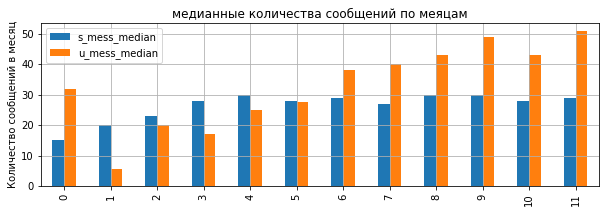

In [62]:
per_month.plot(y=['s_mess_median', 'u_mess_median'], kind='bar', grid=True, figsize=(10, 3))
plt.title('медианные количества сообщений по меяцам')
plt.ylabel('Количество сообщений в месяц')
plt.show()
#plot_per_month('mess_count', 'median')
# smart = 50 messages
# ultra 1000 messages

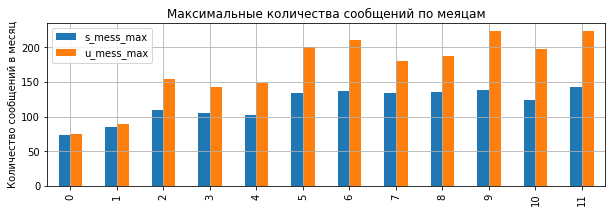

In [63]:
per_month.plot(y=['s_mess_max', 'u_mess_max'], kind='bar', grid=True, figsize=(10, 3))
plt.title('Максимальные количества сообщений по меяцам')
plt.ylabel('Количество сообщений в месяц')
plt.show()

1. В тарифе <b> Smart </b> быстрее устоялось медианное значение количества сообщений в месяц - уже с 4 месяца это стабильно 27-30 сообщений в месяц.
2. В это же время в тарифе <b> Ultra </b> такой стабильности не наблюдается - медианы количества звонков очень сильно меняются от 5 до 50. В среднем - растут от месяца к месяцу, но неравномерно. Возможно, это связано с тем, что по этому тарифу меньше данных, и что больше разброс максимальных значений.
3. В тариф <b> Ultra </b> включено 1000 сообщений. Недостижимое значение - больше 250 сообщений в месяц не отпавил никто.
4. В тариф <b> Smart </b> включено 50 сообщений в месяц. И медианные значения  не превысили этот порог (в средне 27-30 сообщений в месяц). Но в каждом месяце есть пользователи, которые использовали в 2-3 раза больше сообщений.

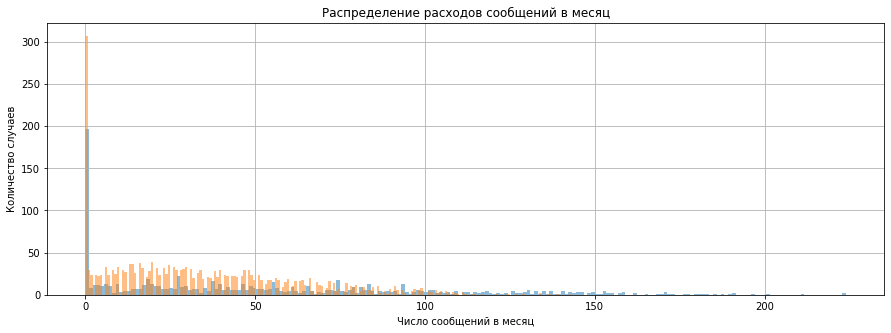

In [64]:
ultra['count_mess'].hist(bins=200, alpha=0.5, figsize=(15, 5))
smart['count_mess'].hist(bins=200, alpha=0.5, figsize=(15, 5))
plt.title('Распределение расходов сообщений в месяц')
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Количество случаев')
plt.show()

In [65]:
# Посмотрим сколько появилось строк с нулями в mess_count
ultra00 = ultra.query('count_mess == 0')
smart00 = smart.query('count_mess == 0')
nulls_month()

число строк с 0 минут в месяц (ultra) 190
общее число строк (ultra) 985
Доля строк с 0 минут в месяц от всех строк в % (ultra): 19.289340101522843%

число строк с 0 минут в месяц (smart) 307
общее число строк (Smart) 2229
Доля строк с 0 значений в месяц от всех строк (smart): 13.772992373261554 %


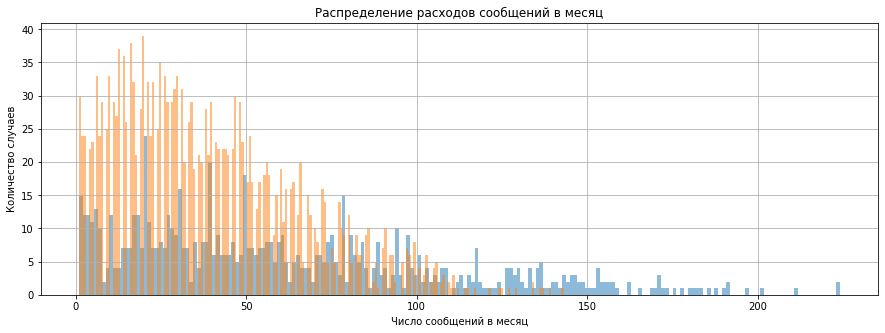

In [66]:
# удалим выбросы с нулевым количеством сообщений. 
# (Помним, что этих данных у нас и не было, они появились, когда мы объединяли таблицы!)
ultra_mess = ultra.query('count_mess != 0')
smart_mess = smart.query('count_mess != 0')
ultra_mess['count_mess'].hist(bins=200, alpha=0.5, figsize=(15, 5))
smart_mess['count_mess'].hist(bins=200, alpha=0.5, figsize=(15, 5))
plt.title('Распределение расходов сообщений в месяц')
plt.xlabel('Число сообщений в месяц')
plt.ylabel('Количество случаев')
plt.show()

In [67]:
# Посмотрим на числовое описние данных и на дисперсии.
var_ultra_mess = np.var(ultra_mess['count_mess'], ddof=1)
var_smart_mess = np.var(smart_mess['count_mess'], ddof=1)

print('дисперсия числа сообщений в месяц для тарифа ultra: ', var_ultra_mess)
print('дисперсия числа сообщений в месяц для тарифа smart: ', var_smart_mess)
print()
print('числовое описание данных по mess_count для тарифа ultra')
print(ultra_mess['count_mess'].describe())
print()
print('числовое описание данных по mess_count для тарифа smart')
print(smart_mess['count_mess'].describe())



дисперсия числа сообщений в месяц для тарифа ultra:  2109.6591828651995
дисперсия числа сообщений в месяц для тарифа smart:  717.5942011753547

числовое описание данных по mess_count для тарифа ultra
count    795.000000
mean      61.161006
std       45.931026
min        1.000000
25%       24.000000
50%       51.000000
75%       87.500000
max      224.000000
Name: count_mess, dtype: float64

числовое описание данных по mess_count для тарифа smart
count    1922.000000
mean       38.716441
std        26.787949
min         1.000000
25%        17.000000
50%        34.000000
75%        55.000000
max       143.000000
Name: count_mess, dtype: float64


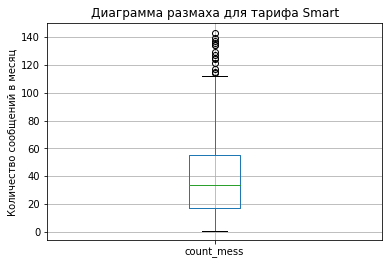

In [68]:
smart_mess.boxplot(column='count_mess')
plt.title('Диаграмма размаха для тарифа Smart')
plt.ylabel('Количество сообщений в месяц')
plt.show()

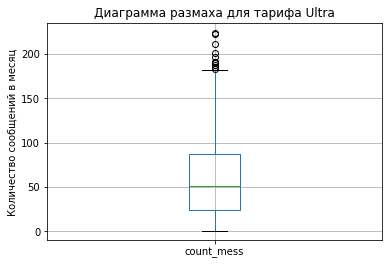

In [69]:
ultra_mess.boxplot(column='count_mess')
plt.title('Диаграмма размаха для тарифа Ultra')
plt.ylabel('Количество сообщений в месяц')
plt.show()

In [70]:
print('---SMART---')
print(smart_mess['count_mess'].quantile(0.99))
iqr_s = 55 - 17
print('IQR=', iqr_s)
print('правый ус:', 55 + iqr_s * 1.5)
print()
print('---ULTRA---')
print(ultra_mess['count_mess'].quantile(0.99))
iqr_u = 87.5 - 24
print('IQR=', iqr_u)
print('правый ус: ', 87.5 + iqr_u * 1.5)

---SMART---
109.0
IQR= 38
правый ус: 112.0

---ULTRA---
188.1199999999999
IQR= 63.5
правый ус:  182.75


In [71]:
mess50 = len((smart_mess.query('count_mess > 50')))
print('Число случаев, не уложившихся в 50 собщений в месяц: ', mess50)
print(f'Доля случаев, когда клиенты не уложились в 50 сообщений тарифа: {mess50 / 19.22} %')

Число случаев, не уложившихся в 50 собщений в месяц:  564
Доля случаев, когда клиенты не уложились в 50 сообщений тарифа: 29.344432882414154 %


##### Тариф  Smart

1. Как и в ситуации с длительностями разговоров, по тарифу <b>smart</b> больше данных. Но их распределение уже не очень похоже на колокол - при малом количестве сообщений, мы тоже имеем достаточно большое число значений.  
2. Медиана - 34 сообщения. Среднее 38.7 сообщений. Большинство данных (99%) умещается до 109 сообщений в месяц.
3. Нормальные значения должны попадать в ящик с усами: <code>IQR = 55 - 17 = 38 </code>, правый ус: <code>Q3 + 1.5 * IQR = 112 сообщений </code>. У нас в нормальные значения попадает 99.7% данных
4. дисперсия количества сообщений в месяц для тарифа <b>smart</b> :  717.6;  std = 26.8
5. Число случаев, которые не уложились в 50 сообщений в месяц = 564. Это более 29%!


##### Тариф Ultra

1. И снова мы имеем меньшее количество данных и при этом более широкое рапределение данных. Картинка распределения  растянутая, неоднородная, перывистая, почти без характерного подъема в середине и со скосом вправо.
2. Медиана - 51 сообщение в месяц. Среднее - 61 сообщение в месяц. 
3. Межквартильный размах <code> IQR = 63.5 собщений в месяц </code>. Правый ус: <code> Q3 + 1.5 * IQR = 182.75 сообщений в месяц </code>. В этот ящик у нас попадает 98.7% данных!
4. Дисперсия кол-ва сообщений в месяц 2109.66. STD = 45.9
5. Ограничение тарифа - 1000 сообщений, но этого предела не достиг никто - максимальное значение составило 224 сообщения в месяц.



Большое стандартное отклонение по тарифу `Ultra` указывает, что   мы имеем очень большой и неоднородный разброс значений, с большим количеством аномалий. 

Собственно, это хорошо видно на диаграмме распределения - нет ничего похожего на нормальное распределение, диаграмма больше на пилу похожа. Скорее всего, это связано с тем, что по этому тарифу недостаточно данных (данных в 2.5 раза меньше, чем по тарифу `Smart`, а диапазон распределения этих данных почти в два раза больше, чем в `Smart`)


[В оглавление](#content)

<a id='step3_3'></a>

### 3.3. Сколько мегабайт

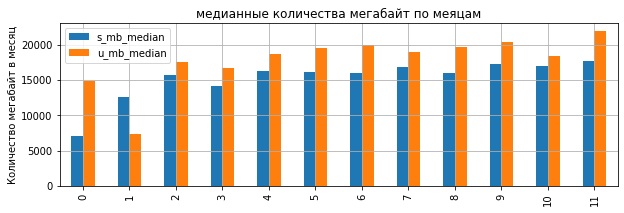

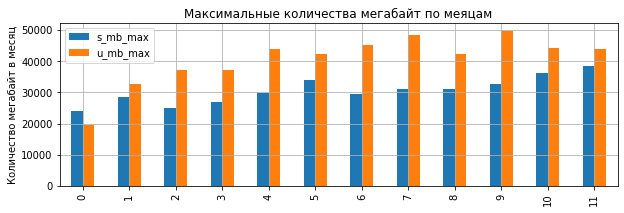

In [72]:
per_month.plot(y=['s_mb_median', 'u_mb_median'], kind='bar', grid=True, figsize=(10, 3))
plt.title('медианные количества мегабайт по меяцам')
plt.ylabel('Количество мегабайт в месяц')
plt.show()

per_month.plot(y=['s_mb_max', 'u_mb_max'], kind='bar', grid=True, figsize=(10, 3))
plt.title('Максимальные количества мегабайт по меяцам')
plt.ylabel('Количество мегабайт в месяц')
plt.show()

# smart = 15*1024 mb = 15360
# ultra = 30*1024 mb = 30720

1. Из всех параметров, расход интернета быстрее всего стабилизировался и вышел на примерно одинаковые медианные значения - уже к 3 месяцу. 

2. В тариф Ultra включено 30 Гб (30720 Мб). И тут картинка резко отличается от предыдущих параметров. Если медианные значения трафика у пользователей Ultra еще укладываются в лимит, то максимальные значения сущетвенно его превышают и достигают 40-50 тысяч Мб.

3. В тариф Smart включено 15 Гб (15360 Мб)в месяц. И здеь даже медианные значения регулярно превышают этот лимит. Максимальные же значения и вовсе часто превышают 30000 Мб


In [73]:
#вспомним, как выглядят наши таблицы
ultra.head()

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,5,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,49,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,29,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,29,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,27,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


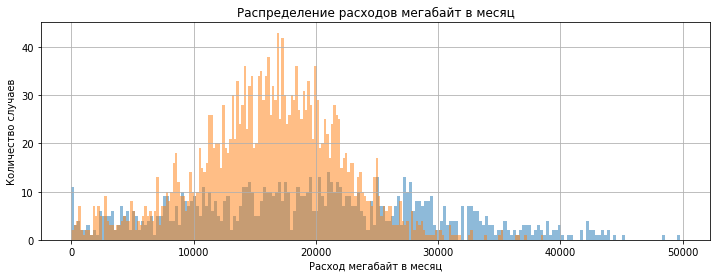

In [74]:
ultra['mb_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
smart['mb_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
plt.title('Распределение расходов мегабайт в месяц')
plt.xlabel('Расход мегабайт в месяц')
plt.ylabel('Количество случаев')
plt.show()

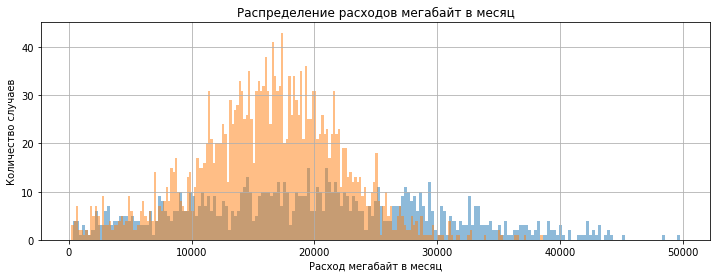

In [75]:
# Здесь выброс нулевых значений небольшой, но мы все равно его должны удалить. 
ultra_mb = ultra.query('mb_sum != 0')
smart_mb = smart.query('mb_sum != 0')
ultra_mb['mb_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
smart_mb['mb_sum'].hist(bins=200, alpha=0.5, figsize=(12, 4))
plt.title('Распределение расходов мегабайт в месяц')
plt.xlabel('Расход мегабайт в месяц')
plt.ylabel('Количество случаев')
plt.show()

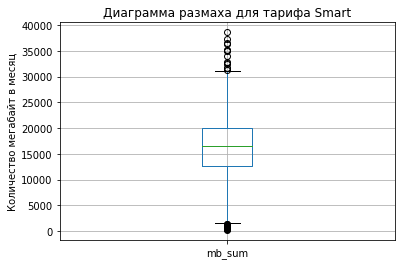

In [76]:
smart_mb.boxplot(column='mb_sum')
plt.title('Диаграмма размаха для тарифа Smart')
plt.ylabel('Количество мегабайт в месяц')
plt.show()

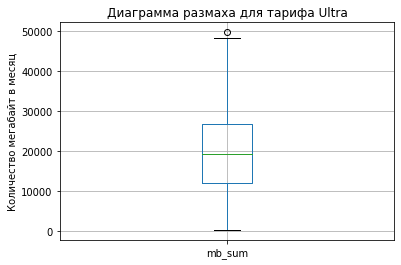

In [77]:
ultra_mb.boxplot(column='mb_sum')
plt.title('Диаграмма размаха для тарифа Ultra')
plt.ylabel('Количество мегабайт в месяц')
plt.show()

In [78]:
# Числовое описние данных и  дисперсии.
var_ultra_mb= np.var(ultra_mb['mb_sum'], ddof=1)
var_smart_mb = np.var(smart_mb['mb_sum'], ddof=1)

print('дисперсия числа Мб в месяц для тарифа ultra: ', var_ultra_mb)
print('дисперсия числа Мб в месяц для тарифа smart: ', var_smart_mb)
print()
print('числовое описание данных по mb_sum для тарифа ultra')
print(ultra_mb['mb_sum'].describe())
print()
print('числовое описание данных по mb_sum для тарифа smart')
print(smart_mb['mb_sum'].describe())


дисперсия числа Мб в месяц для тарифа ultra:  98746498.93277423
дисперсия числа Мб в месяц для тарифа smart:  34340091.55358943

числовое описание данных по mb_sum для тарифа ultra
count      974.000000
mean     19706.979466
std       9937.127298
min        366.000000
25%      12073.750000
50%      19427.500000
75%      26936.250000
max      49789.000000
Name: mb_sum, dtype: float64

числовое описание данных по mb_sum для тарифа smart
count     2227.000000
mean     16243.763359
std       5860.041941
min        202.000000
25%      12677.000000
50%      16533.000000
75%      20068.000000
max      38610.000000
Name: mb_sum, dtype: float64


In [79]:
print('---SMART---')
print(smart_mb['mb_sum'].quantile(0.99))
print(smart_mb['mb_sum'].quantile(0.993))
iqr_s = 20068 - 12677
print('IQR=', iqr_s)
print('Ящик с усами (правый ус):', 20068 + iqr_s * 1.5)
print()
print('---ULTRA---')
print(ultra_mb['mb_sum'].quantile(0.99))
print(ultra_mb['mb_sum'].quantile(0.999))
iqr_u = 26936.25 - 12073.75
print('IQR=', iqr_u)
print('Ящик с усами (правый ус):', 26936.25 + iqr_u * 1.5)

---SMART---
29729.17999999998
31032.466000000004
IQR= 7391
Ящик с усами (правый ус): 31154.5

---ULTRA---
43059.13
48432.63800000022
IQR= 14862.5
Ящик с усами (правый ус): 49230.0


In [80]:
print('Smart')
mb15 = len((smart_mb.query('mb_sum > 15360')))
print('Число случаев, не уложившихся в 15 Гб в месяц: ', mb15)
print(f'Доля случаев, когда клиенты не уложились в 15 Гб тарифа: {mb15 / 22.27} %')

Smart
Число случаев, не уложившихся в 15 Гб в месяц:  1309
Доля случаев, когда клиенты не уложились в 15 Гб тарифа: 58.778625954198475 %


In [81]:
print('Ultra')
mb30 = len((ultra_mb.query('mb_sum > 30720')))
print('Число случаев, не уложившихся в 30 Гб в месяц: ', mb30)
print(f'Доля случаев, когда клиенты не уложились в 30 Гб тарифа: {mb30 / 9.74} %')

Ultra
Число случаев, не уложившихся в 30 Гб в месяц:  134
Доля случаев, когда клиенты не уложились в 30 Гб тарифа: 13.757700205338809 %


##### Тариф  Smart

1. Медиана - 16533 Мб (это больше, чем объем трафика, включенный в тариф!). Среднее 16243 Мб. Значения близки между собой. Мы имеем красивое симметричное распределение.
3. Большинство данных (99%) умещается до 29729 Мб в месяц.
3. Нормальные значения должны попадать в ящик с усами: <code>IQR = 7391 </code>, правый ус: <code>Q3 + 1.5 * IQR = 31154.5 Мб </code>. У нас в нормальные значения попадает 99.3% данных
4. дисперсия =34340091.5 Мб;  std = 5860
5. Число случаев, которые не уложились в 15 Гб в месяц = 1309. Это почти 59%.

##### Тариф Ultra
1. Медиана - 19427.5 Мб в месяц. Среднее - 19706.9 Мб в месяц. 
2. Межквартильный размах <code> IQR = 14862.5 Мб в месяц </code>. Правый ус: <code> Q3 + 1.5 * IQR = 49230.0 Мб в месяц </code>. В этот ящик у нас попадает 99.9% данных.
3. Дисперсия = 98746499 Мб. STD = 9937
4. Ограничение тарифа - 30 Гб. В 134 случаях пользователи превысили это ограничение. Это 13.7%


[В оглавление](#content)

<a id='step3_4'></a>
    
### 3.4. Анализ выручки
    


In [82]:
users_month.head()

,user_id,month,calls_count,calls_sum,count_mess,mb_count,mb_sum,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5,22,159,22,5,2256,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6,43,172,60,49,23257,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7,47,340,75,29,14016,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8,52,408,81,29,14070,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9,58,466,57,27,14581,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950


In [83]:
income_month = users_month.pivot_table(index=['month'], 
                                    columns='tariff',
                                    values=['income'],
                                    aggfunc={'mean', 'sum', 'max'}
                                   ).reset_index()
display(income_month.head(3))
display(income_month.columns)

income_month.columns = ['_'.join(col).rstrip('_') for col in income_month.columns]

#display(income_month.head(3))
display(income_month.columns)

income_month = income_month.rename(columns = {#'month' = 'month', 
                                              'income_max_smart' : 's_income_max', 
                                              'income_max_ultra' : 'u_income_max', 
                                              'income_mean_smart' : 's_income_mean', 
                                              'income_mean_ultra' : 'u_income_mean', 
                                              'income_sum_smart' : 's_income_sum', 
                                              'income_sum_ultra' : 'u_income_sum'})

display(income_month.head(3))
display(income_month.columns)


month  income                                                    
                 max                 mean                   sum         
tariff         smart   ultra        smart        ultra    smart    ultra
0          1  2350.0  1950.0   721.323529  1950.000000  24525.0  17550.0
1          2  3432.0  2250.0   827.603448  1975.000000  48001.0  47400.0
2          3  2721.0  3000.0  1164.623377  2014.864865  89676.0  74550.0

MultiIndex([( 'month',     '',      ''),
            ('income',  'max', 'smart'),
            ('income',  'max', 'ultra'),
            ('income', 'mean', 'smart'),
            ('income', 'mean', 'ultra'),
            ('income',  'sum', 'smart'),
            ('income',  'sum', 'ultra')],
           names=[None, None, 'tariff'])

Index(['month', 'income_max_smart', 'income_max_ultra', 'income_mean_smart',
       'income_mean_ultra', 'income_sum_smart', 'income_sum_ultra'],
      dtype='object')

,month,s_income_max,u_income_max,s_income_mean,u_income_mean,s_income_sum,u_income_sum
0,1,2350.0,1950.0,721.323529,1950.000000,24525.0,17550.0
1,2,3432.0,2250.0,827.603448,1975.000000,48001.0,47400.0
2,3,2721.0,3000.0,1164.623377,2014.864865,89676.0,74550.0


Index(['month', 's_income_max', 'u_income_max', 's_income_mean',
       'u_income_mean', 's_income_sum', 'u_income_sum'],
      dtype='object')

,user_id,u_income_max,u_income_mean,u_income_sum
0,1000,1950.0,1950.0,15600.0
1,1003,1950.0,1950.0,9750.0
2,1004,1950.0,1950.0,15600.0
3,1013,1950.0,1950.0,3900.0
4,1016,1950.0,1950.0,3900.0


,user_id,s_income_max,s_income_mean,s_income_sum
0,1001,1350.0,950.000000,1900.0
1,1002,1550.0,1035.714286,7250.0
2,1005,1219.0,827.000000,9924.0
3,1006,1550.0,931.818182,10250.0
4,1007,1750.0,935.666667,8421.0


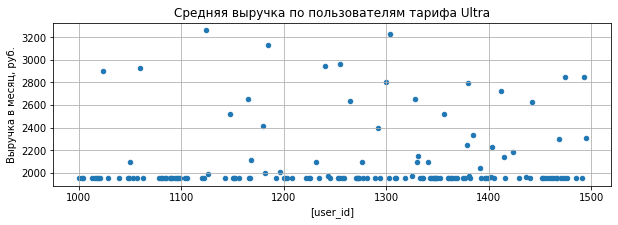

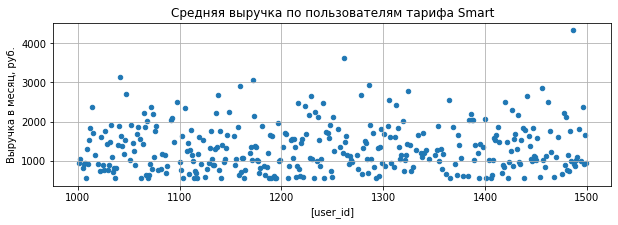

In [84]:
income_ultra = ultra.pivot_table(index=['user_id'], 
                                    values=['income'],
                                    aggfunc={'mean', 'sum', 'max'}
                                   ).reset_index()
income_ultra.columns = ['user_id', 'u_income_max', 'u_income_mean', 'u_income_sum']
display(income_ultra.head())
income_smart = smart.pivot_table(index=['user_id'], 
                                    values=['income'],
                                    aggfunc={'mean', 'sum', 'max'}
                                   ).reset_index()
income_smart.columns = ['user_id', 's_income_max', 's_income_mean', 's_income_sum']
display(income_smart.head())

(income_ultra.plot(x=['user_id'], y=['u_income_mean'], kind='scatter', grid=True, figsize=(10, 3)))
plt.title('Средняя выручка по пользователям тарифа Ultra')
plt.ylabel('Выручка в месяц, руб.')
plt.show()
(income_smart.plot(x=['user_id'], y=['s_income_mean'], kind='scatter', grid=True, figsize=(10, 3)))
plt.title('Средняя выручка по пользователям тарифа Smart')
plt.ylabel('Выручка в месяц, руб.')
plt.show()


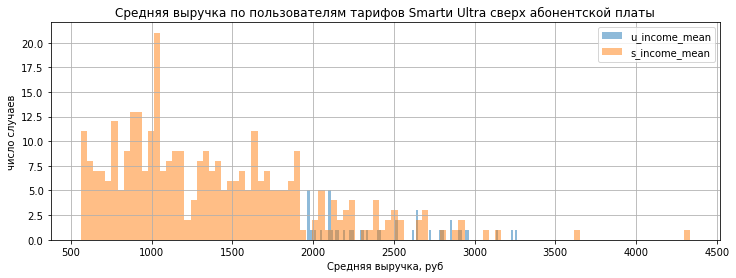

In [85]:
(income_ultra
 .query('u_income_mean > 1950')['u_income_mean']
 .hist(bins=100, 
       alpha=0.5, 
       legend= True,
       figsize=(12, 4)))
# Посмотрим на гистограмму распределения выручки по тарифу Smart,
# исключив для наглядности тех, кто уложился в абонентскую плату 550 руб в месяц.
(income_smart
 .query('s_income_mean > 550')['s_income_mean']
 .hist(bins=100, 
       alpha=0.5, 
       legend= True,
       figsize=(12, 4)))
plt.title('Средняя выручка по пользователям тарифов Smartи Ultra сверх абонентской платы')
plt.xlabel('Средняя выручка, руб')
plt.ylabel('число случаев')
plt.show()


In [86]:
var_income_ultra = np.var(income_ultra['u_income_mean'], ddof=1)
var_income_smart = np.var(income_smart['s_income_mean'], ddof=1)

print('дисперсия средней месячной выручки по пользователям для тарифа ultra: ', var_income_ultra)
print('дисперсия средней месячной выручки по пользователям для тарифа smart: ', var_income_smart)
print()
print('числовое описание данных по средней выручке для тарифа ultra')
print(income_ultra['u_income_mean'].describe())
print()
print('числовое описание данных по средней выручке для тарифа smart')
print(income_smart['s_income_mean'].describe())


дисперсия средней месячной выручки по пользователям для тарифа ultra:  90509.18930635793
дисперсия средней месячной выручки по пользователям для тарифа smart:  368269.29044770286

числовое описание данных по средней выручке для тарифа ultra
count     148.000000
mean     2087.417442
std       300.847452
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1990.625000
max      3262.500000
Name: u_income_mean, dtype: float64

числовое описание данных по средней выручке для тарифа smart
count     350.000000
mean     1329.726499
std       606.851951
min       550.000000
25%       878.541667
50%      1183.100000
75%      1682.694444
max      4333.333333
Name: s_income_mean, dtype: float64


Посмотрим на распределение средней месячной выручки по пользователям. 
##### Ultra
Хорошо видно, что для пользователей тарифа `Ultra` характерна средняя выручка, равная абонентской плате (1950 руб) - пользователи этого обширного тарифа редко вылезают за его рамки. Помним, что зв границы включенных в тариф параметров пользователи вылезали лишь по расходу интернет-трафика, которого всегда не хватает на всех. Значения выручки расположились на картинке 'в ниточку'.
    
##### Smart
А вот у пользователей тарифа `Smart` распределение выручки выглядит не так дисциплинированно и больше похоже на облако. Пользователи этого тарифа по всем параметрам регулярно не помещаются в рамки тарифа - и по длительности звонков, и по числу сообщений и по объему трафика. Но всё-таки бОльая часть облака (86%) расположена ниже 2000 руб
    
Большая дисперсия в тарифе `Smart` объясняется тем, что разброс значений здесь в три раза шире (от 550 руб до 4300), чем в тарифе `Ultra` (от 1950 руб до 3200)
    

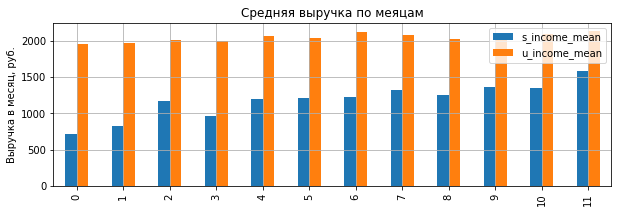

In [87]:
income_month.plot(y=['s_income_mean', 'u_income_mean'], kind='bar', grid=True, figsize=(10, 3))
plt.title('Средняя выручка по меяцам')
plt.ylabel('Выручка в месяц, руб.')
plt.show()

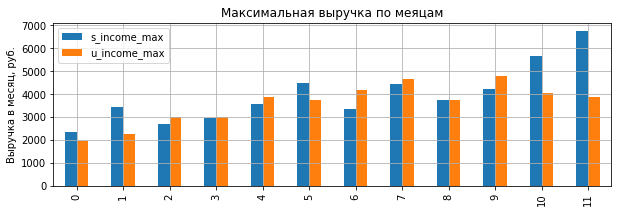

In [88]:
income_month.plot(y=['s_income_max', 'u_income_max'], kind='bar', grid=True, figsize=(10, 3))
plt.title('Максимальная выручка по меяцам')
plt.ylabel('Выручка в месяц, руб.')
plt.show()

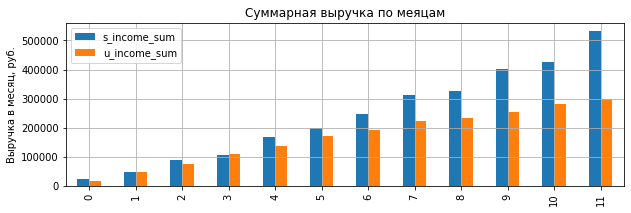

In [89]:
income_month.plot(y=['s_income_sum', 'u_income_sum'], kind='bar', grid=True, figsize=(10, 3))
plt.title('Суммарная выручка по меяцам')
plt.ylabel('Выручка в месяц, руб.')
plt.show()

In [90]:
# Суммарная выручка по тарифам
print(income_month['s_income_sum'].sum())
print(income_month['u_income_sum'].sum())

2885751.0
2040000.0


    
#### Посмотрим на распределения месячной выручки по месяцам. 
    
##### Средняя выручка за каждый месяц
Получается  очень любопытная картина. Если мы посмотрим средние значения выручки по каждому месяцу, то увидим, что средняя выручк по тарифу `Smart` (1300-1400 руб в самые стабильные месяцы) ниже средней выручки по тарифу `Ultra`(около 2000 руб).
    
##### Максимальная выручка за каждый месяц
Однако, если мы посмотрим на максимальную выручку за каждый месяц, то увидим, что во втором полугодии выручка по тарифу `Smart` сравнима, а в ноябре-декабре в полтора раза превышает максимальную выручку по тарифу `Ultra`
    
##### Суммарная выручка за каждый месяц    
Еще интереснее выглядит суммарная выручка по месяцам. Вспомним, что пользователей тарифа `Smart` в 2.5 раза больше, чем пользователей тарифа `Ultra`. Отсюда вытекает, что суммарная выручка по тарифу `Smart` за каждый меяц растёт быстрее, чем по тарифу `Ultra`
    
### Вывод.
1. Тариф `Smart` существенно дешевле, чем `Ultra`. За счет этого его гораздо охотнее берут на "попробовать", и вообще охотнее берут те, кто не планирует регулярно вылезать далеко за пределы включенных в тариф параметров.
2. При этом тариф `Smart` маленький - пользователи часто не помещаются в его пределы и по звонкам, и по сообщениям и по объему трафика. Это может привести к оттоку тех пользователей, кто много общатся и много пользуется интернетом.
3. Средняя выручка за месяц по тарифу `Ultra` выглядит привлекательнее, чем выручка по тарифу `Smart`. Однако, за  счет того, что тариф Smart популярнее, суммарная выручка по нему здорово обгоняет суммарную выручку по тарифу `Ultra`. И в итоге, за весь год выручка по тарифу `Smart` почти в полтора раза превысила выручку по тарифу `Ultra`
    


[В оглавление](#content)

<a id='step4'></a>

## Шаг 4. Проверка гипотез
1. средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
2. средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;


[В оглавление](#content)

<a id='step4_1'></a>

### 4.1. Cредняя выручка пользователей тарифов «Ультра» и «Смарт»

In [91]:
print('числовое описание данных выручке для тарифа ultra')
print(ultra['income'].describe())
print()
print('числовое описание данных по выручке для тарифа smart')
print(smart['income'].describe())


числовое описание данных выручке для тарифа ultra
count     985.000000
mean     2071.065990
std       378.802377
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: income, dtype: float64

числовое описание данных по выручке для тарифа smart
count    2229.000000
mean     1294.639300
std       820.933202
min       550.000000
25%       550.000000
50%      1038.000000
75%      1750.000000
max      6770.000000
Name: income, dtype: float64


Надо поверить гипотезу: отличается ли средняя выручка пользователей тарифов «Ультра» и «Смарт».\
Будем проверять гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам: пользователи тарифа Ultra и пользователи тарифа Smart - это две разные генеральные совокупности. Воспользуемся методом scipy.stats.ttest_ind()
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.\
Значит, Нулевая гипотеза (Н0): средняя выручка пользователей тарифа Ultra равна средней выручке с пользователей тарифа Smart.\
Альтернативная гипотеза (H1)\ средняя выручка пользователей тарифов «Ультра» и «Смарт» различается


In [92]:
alpha = 0.05
results = st.ttest_ind(ultra['income'], smart['income'])
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  2.9776448000521676e-158
Отвергаем нулевую гипотезу


##### p-value очень очень маленькое (порядок значений 10 в -158 степени).
Вывод: Скорее всего, все-таки средняя выручка с пользователей тарифа Ultra отличается от средней выручки тарифа Smart.

[В оглавление](#content)

<a id='step4_2'></a>

### 4.2. средняя выручка пользователей из Москвы и из других регионов

In [93]:
moscow = users_month.query('city == "Москва"')
regions = users_month.query('city != "Москва"')
print('числовое описание данных по выручке для Москвы')
print(moscow['income'].describe())
print()
print('числовое описание данных по выручке для остальных регионов')
print(regions['income'].describe())

числовое описание данных по выручке для Москвы
count     611.000000
mean     1550.805237
std       752.451347
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: income, dtype: float64

числовое описание данных по выручке для остальных регионов
count    2603.000000
mean     1528.316942
std       810.411374
min       550.000000
25%       750.000000
50%      1587.000000
75%      1950.000000
max      6770.000000
Name: income, dtype: float64


Гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Будем проверять гипотезу о равенстве средних двух генеральных совокупностей по взятым из них выборкам. Воспользуемся методом scipy.stats.ttest_ind()
Нулевая гипотеза всегда формулируется так, чтобы использовать знак равенства.\
Значит, Нулевая гипотеза (Н0): средняя выручка пользователей из Москвы равна средней выручке с пользователей из других регионов.\
Альтернативная гипотеза (H1)\ средняя выручка пользователей из Москвы отличается от средней выручки пользователей из других регионов.

In [94]:
alpha = 0.05
results = st.ttest_ind(moscow['income'], regions['income'])
print('p-значение: ', results.pvalue)
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  0.531666503831252
Не получилось отвергнуть нулевую гипотезу


Такой результат не даёт нам основания отвергнуть гипотезу о том, что средняя выручка по Москве не отличается от средней выручки по остальным регионам.\
При условии, что нулевая гипотеза верна, вероятность получить наблюдаемые в нашей выборке результаты составляет 53%.

[В оглавление](#content)

<a id='step5'></a>

## Шаг 5. Общий вывод

Мы изучили выборку по 500 пользователям за 2018 год из данных о пользователях тарифных планов Ultra и Smart компании "Мегалайн".
1. Тариф Smart существенно популярнее тарифа Ultra: более, чем в 2 раза. Но можду этими тарифами очень большая разница в стоимости - 550 рублей абонентской платы потив 1950 рублей в месяц.
2. В среднем люди тратят на разговоры 400-500 минут в месяц. Большинство (более 90%) пользователей укладывается в разговоры до 1000 минут в месяц. В 34% случаев пользователи Smart не укладываются в лимит тарифа в 500 минут разговора и вынуждены доплачивать з рубля за минуту разговора. Пользователи тарифа Ultra так и не смогли достичь порогового значения 3000 минут.
3. Пользователи Smart татят в среднем 34-40 сообщений в месяц. Большинство (99%) укладывается до 109 сообщений в месяц. Почти 30% пользователей тарифа Smart не укладывается в отведенные 50 сообщений в месяц. 
4. Пользователи Ultra тратят в среднем 50-60 сообщений в месяц. Большинство укладывается до 190 сообщений в месяц. Ограничение в 1000 сообщений почти недостижимо - максимально было израсходовано 224 сообщения.
5. В отличае от разговоров и СМС, интернета не хватает всем! Среди пользователей тарифа Smart в 15 ГБ не уложились 59%. Даже среднее количество израсходованного трафика перекрывает ограничение по тарифу и составляет  16  Гб. Разброс же нормальных значений достигает 31 Гб
6. Среди пользователей тарифа Ultra в 30 Гб не уложились 13.7%  Пользователи Ultra в среднем используют около 19 Гб в месяц, но разброс нормальных значений достигает почти 50 Гб

7. Средняя выручка за месяц по тарифу `Ultra` (2000 руб) выглядит привлекательнее, чем выручка по тарифу `Smart`(1300 руб). Однако, за  счет того, что тариф Smart в 2.5 раза популярнее, суммарная выручка по нему здорово обгоняет суммарную выручку по тарифу `Ultra`. И в итоге, за весь год выручка по тарифу `Smart` (2885751 руб) почти в полтора раза превысила выручку по тарифу `Ultra` (2040000 руб)
    - Тариф Smart существенно дешевле, чем Ultra. За счет этого его гораздо охотнее берут на "попробовать", и вообще охотнее берут те, кто не планирует регулярно вылезать далеко за пределы включенных в тариф параметров.
    - При этом тариф Smart маленький - пользователи часто не помещаются в его пределы и по звонкам, и по сообщениям и по объему трафика. Это может привести к оттоку тех пользователей, кто много общатся и много пользуется интернетом.
    

----
8. Проверка гипотезы о равенстве средних значений выручки с пользователей тарифов «Ультра» и «Смарт» по выборке, позволяет предполагать, что скорее всего выручка с тарифа Smart отличается от выручки с тарифа Ultra.
9. У нас нет  основания отвергнуть гипотезу о том, что средняя выручка по Москве не отличается от средней выручки по остальным регионам.

